In [1]:
#!pip list #To obtain requirements.txt for TensorFlow 2-11 kernel

In [2]:
# Notebook Summary:

# V.History: 
# Date Last Modified: 14 May 2025

#--------------------------------------------------------------------------------------------------
'''
    This is a lightGBM model that trains on 58 Input parameters and predicts orthophosphate
    This notebook stores the model into a pickle file under pkls subdirectory and 
    stores all encoder files into pickle files. Following are pickles for all encoders 
    these need to be used while using a pre-trained model for predictions

    Following are the label encoders created newly:
        4. samplingPoint_notation        - encoder_samplingPoint_notation.pkl
        5. Season                        - encoder_Season.pkl
        6. Day_of_Week                   - encoder_Day_of_Week.pkl
        7. Month_of_Year                 - encoder_Month_of_Year.pkl
        8. longitude                     - encoder_longitude.pkl
        9. latitude                      - encoder_latitude.pkl
        
    Following are the label encoders created previously:
        1. isComplianceSample            - encoder_isComplianceSample.pkl
        2. purpose_name                  - encoder_purpose_name.pkl
        3. determinand_unit_name         - encoder_determinand_unit_name.pkl
    
    Date: May 15, 2025

    This step enables the model to recognise compliance samples, their purposes, and the varied 
    unit names of Determinands.
'''
#--------------------------------------------------------------------------------------------------


#--------------------------------------------------------------------------------------------------
#Pre-Requisite : 
    #Kernel TensorFlow 2-11 (ipykernel) is required to run this notebook 
    #Required TensorFloa Kernel with python version - Python 3.10.15 and its 
    #compatible Numpy , ScikitLearn libraries

#Old Name: 16_NB_Pred_Pt2_v9Test_Ortho2959_SpatioTemp_LGMB.ipynb
#--------------------------------------------------------------------------------------------------

'''
    Intro Section
'''

'\n    Intro Section\n'

In [3]:
#Check python version compatibility 3.10 or above is required
!python -V
python_version=!(python --version 2>&1)
print (python_version)

Python 3.10.15
['Python 3.10.15']


In [4]:
def showtime():
    import time
    from datetime import datetime
    
    t = time.localtime()
    d = datetime.now()
    current_time = time.strftime("%H:%M:%S", t)
    current_date = d.strftime("%d %B %Y")
    print(current_date, current_time)
    return()

In [5]:
showtime()
# This requires Tersorflow 2-11 Kernel
#Predicting for Section 82 parameters i.e Train the dataset for the whole of 24 years
# with all optimally correlated parameters but validate only with Section 82 parameters 

# To activate this environment, use                                                                                                                                          
#$ conda activate rapids-25.02                                                                                                                                          
#                                                                                                                                                                            
# To deactivate an active environment, use                                                                                                                                   
#$ conda deactivate    

#https://neptune.ai/blog/saving-trained-model-in-python | Steps to save the trained model

#Predict model for Orthophosphate

#MAPE MAE and MAE explanations are under this website:
#https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

#R2 and Adjusted R2 explanations are under
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

#{'180':'OrthoP'}
#{'192':'Phosphate'}
#{'348':'Phosphorus'}
#{'9398':'OrthoPAsP'}


# <<<FINAL Validation LIST OF FEATURES>>> Modified the "FINAL LIST OF FEATURES" (Total: 58 | 46 Params + 6 Sec-81 params + 6 Spatio Params)
optimal_feat_with_r_mon = ['samplingPoint_notation','samplingPoint_easting','samplingPoint_northing','purpose_name_label','determinand_unit_name_label',
                           'isComplianceSample_label',
                           '116','111','117','118','119','9924','162','85','135','172',           #10
                           '241','237','158','182','211','3683','9686','114','113','76',          #10
                           '301','61','9901','183','143','461','207','463','177','6450',          #10
                           '6455','749','209','205','9856','7859','1183','239','175','235',       #10
                           '1181','82','68',                                                      #03
                           '180','192','348'                                                      #03
                           #'OrthoP','Phosphate','Phosphorus' Consider 61 - pH 17% corr
                          ]
    
'''
# <<<FINAL LIST OF FEATURES>>> WITH REACTIVE MONITORING - COVERING SIX SEC 82 PARAMS IN DESCENDING SEQ OF SPEARMAN CORR (57 PARAMS Except Spatio)
optimal_feat_with_r_mon = ['samplingPoint_notation', 'samplingPoint_easting', 'samplingPoint_northing', 'purpose_name_label', 
                           'determinand_unit_name_label', 'isComplianceSample_label',
                           '117', '118', '119', '9924', '241', '237', '158', 
                           '211', '76', '301', '9901', '207', '463', '77', '6450', '6455', '7859', '1183', '1181', '82', 
                           '6528', '163', '6529', '6452', '6530', '6460', '3410', '52', '6531', '3408', '108', '3409', '7887', '50', '6462',
                           '3164', '106', '164', '6051', '460', '186', '6458', '105', '6045', '2348', '6050', '68', 
                           '180', '192', '348'
                           #'OrthoP','Phosphate','Phosphorus' Consider 61 - pH 17% corr
                          ]


#<<<FINAL LIST OF FEATURES>>> WITHOUT REACTIVE MONITORING - COVERING SIX SEC 82 PARAMS IN DESCENDING SEQ OF SPEARMAN CORR (57 PARAMS)
optimal_feat_without_r_mon = ['sampleDateOnly','samplingPoint_easting','samplingPoint_northing','purpose_name_label',
                              'determinand_unit_name_label',
                              'isComplianceSample_label',
                              '117','118','119','9924','241','237','158',
                              '211','76','301','9901','207','463','77','6450','6455','7859','1183','1181','82',
                              '6528','163','6529','6452','6530','6460','3410','52','6531','3408','108','3409','7887','50','6462',
                              '3164','106','164','6051','460','186','6458','105','2348','6045','68',
                              '180','192','348','9398'
                              #'OrthoP','Phosphate','Phosphorus','Orthophosphate as P'  Consider 61 - pH 17% corr
                             ]
#optimal_feat_with_r_mon, optimal_feat_without_r_mon
'''

validation_Set = ['samplingPoint_notation_label','samplingPoint_easting','samplingPoint_northing','purpose_name_label','determinand_unit_name_label',
                  'isComplianceSample_label',
                  'purpose_name_label', 
                  'longitude_label', 'latitude_label',
                  '61','76','77','111','116','117','118','119','162','180','9901','9924', #Explainable Params for the SP NE-44400163, DEERNESS U/S PRIEST BURN, Wear & Tees area | https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true
                  'Day_of_Month', 'Week_of_Year', 'Season_label','Day_of_Week_label','Month_of_Year_label' #Temporal params
                 ]

16 May 2025 10:38:32


In [6]:
print(len(optimal_feat_with_r_mon))

52


In [7]:
#Section_82_Yes 20 Determinands After Xylem discussion
Section_82_Yes = [61,68,76,81,82,119,3169,3656,3976,5282,6872,7064,
                  7786,8153,8958,9261,9803,9901,9921,9924]

#Section_82_Unsure 11 Determinands
lstSection_82_Unsure = [152,153,159,162,5245,8467,8471,9087,9088,9089,9821]

#First 18 parameters using Pearson correlation for the Phosphate - Feb 27 2025
First_18_Pearson_Pt = [912,914,8128,384,1361,7245,1284,8648,6971,
                       947,6972,82,6453,8476,7668,81,6854,162,8504]

altitude = [5]

# 8 Determinands
temperature = [22, 24, 76, 1181, 3026, 6530, 8091, 8918]

orthoP = [180]
orthoPLike = [188, 191, 8068, 8755, 9398, 9856]

Phosphate = [192]
PhophateLike = [4127, 7315, 8504]

#Temperature related
#determinand_notation determinand_name determinand_definition result determinand_unit_name
#22   Temp Dry Blb Weather : Temperature Dry Bulb 11.2 cel
#24   Temp Wet Blb Weather : Temperature Wet Bulb 9.79 cel
#76   Temp Water Temperature of Water 5 cel
#1181 WethPresTemp Weather : Temperature 4 coded
#3026 WethYdy Temp Weather : Temperature : Previous 24 hours 4 coded
#6530 Weth7Dy-Temp Weather : Temperature : Past 7 days 4 coded
#8091 AIR TEMP Weather : Temperature of Air 10.3 cel
#8918 Gas Temp Temperature of Gas 6 cel


#Sec82_Yes 
#61	pH	pH	pH
#68	Turbidity	Turbidity	Turbidity
#76	Temp Water	Temperature of Water	Temperature
#81	O Diss% Satn	Oxygen, Dissolved, % Saturation : (Laboratory)	Oxygen
#82	O Dissolved	Oxygen, Dissolved : (Laboratory) as O2	Oxygen
#119	NH3 un-ion	Ammonia un-ionised as N	Ammonia un-ionised as N
#3169	pH in-situ	pH : In Situ	pH : In Situ
#3656	AmmUnionSal	Ammonia Unionised : Saline as N	Ammonia Unionised : Saline as N
#3976	Turbdty in-s	Turbidity : In Situ	Turbidity
#5282	NH3 SD DW	Ammonia : Steam distilled : Dry Wt (as N)	Ammonia : Steam distilled : Dry Wt (as N)
#6872	NH4+FieldDet	Ammonium : In Situ as NH4	Ammonium : In Situ as NH4
#7064	Sld Sus-OptT	Solids, Suspended, (Optical Turbidity)	Turbidity
#7786	DO YSI 3800	Oxygen, Dissolved : Grant YSI 3800 : In Situ	Oxygen
#8153	Ammonium	Ammonium as NH4	Ammonium as NH4
#8958	Ammonia	Ammonia	Ammonia
#9261	pH (Insitu)	pH : Grant YSI 3800 : In Situ	pH : Grant YSI 3800 : In Situ
#9803	AmmoniaNoIo%	Ammonia un-ionised : % of Total	Ammonia un-ionised : % of Total
#9901	O Diss %sat	Oxygen, Dissolved, % Saturation	Oxygen
#9921	pH Inst unit	pH : Instrumental	pH : Instrumental
#9924	Oxygen Diss	Oxygen, Dissolved as O2	Oxygen


In [8]:
#For drawing sattelitte maps
! pip install geopandas  | grep -v 'Requirement already satisfied'
! pip install contextily  | grep -v 'Requirement already satisfied'
! pip install pyproj | grep -v 'Requirement already satisfied'
! pip install geodatasets --upgrade  | grep -v 'already satisfied'
! pip install osmnx  | grep -v 'already satisfied'
! pip install optuna | grep -v 'already'



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
#!pip install --force-reinstall numpy==2.1.3
#!pip install --force-reinstall numpy==1.24.0 


In [10]:
#!pip install tensorflow tensorflow_decision_forests | grep -v 'already'
#!pip install --upgrade tensorflow tensorflow_decision_forests | grep -v 'already'

#!pip install --upgrade randomforestmodule
#from keras.utils import timeseries_dataset_from_array


In [11]:
!pip install permetrics | grep -v 'Requirement already satisfied'

#!pip install --ignore-installed --upgrade tensorflow 
#!pip install --upgrade scikit-learn | greb -v 'already'


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [12]:
#!pip install --upgrade tensorflow  | grep -v 'already' Commented on 16 May 2025


In [13]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense


In [14]:
#!nvidia-smi

In [15]:
#! pip install \
#    --extra-index-url=https://pypi.nvidia.com \
#    "cudf-cu12==25.2.*" | grep -v 'already'


In [16]:

#import cudf.pandas
#cudf.pandas.install()
#!conda list cuda-python

#!conda install -c nvidia cuda-python=12.8.0 y

#pip install --exists-action=i scikit-learn

#import cupy

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from permetrics.regression import RegressionMetric

import matplotlib.pyplot as plt

#Outlier Detection and Removal
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile
import geopandas as gpd
import contextily as ctx
from pyproj import Transformer
import geodatasets
import matplotlib.cm as cm
import matplotlib.colors as colors
import osmnx as ox
from matplotlib.colors import LinearSegmentedColormap

from IPython.display import display
#pd.set_option("max_columns", None) # show all cols
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [18]:
#TESTING DUMMY OF DETERMINAND UNIT NAME's INFLUENCE - BEGIN
import statsmodels.api as sm
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)


In [19]:
#User-Defined functions
def showtime():
    import time
    from datetime import datetime
    
    t = time.localtime()
    d = datetime.now()
    current_time = time.strftime("%H:%M:%S", t)
    current_date = d.strftime("%d %B %Y")
    print(current_date, current_time)
    return()

In [20]:
#Function to print column-wise total number of actual observations (ignores zeroes) for a given dataset
def find_non_zero_lt_100(data):
    num=0
    count_of_non_zero_lt_100 = []
    total_len = len(data)
    for i in data.columns:
        num += data[i][data[i]==0.0].count()
        count_of_non_zero = total_len - data[i][data[i]==0.0].count()
        #print (data[i].name, ' | ', count_of_zero)
        #if (i==192):
        if (count_of_non_zero<=100):
            print ('Determinand: ', i, ' has Total | Valid values', total_len, '|', count_of_non_zero )
            count_of_non_zero_lt_100.append(i) 

    return (count_of_non_zero_lt_100)

In [21]:
#Find sum of non-zero values
#print(print(np.count_nonzero(data==0)))
def find_non_zero(data):
    num=0
    total_len = len(data)
    for i in data.columns:
        num += data[i][data[i]==0.0].count()
        count_of_non_zero = total_len - data[i][data[i]==0.0].count()
        #print (data[i].name, ' | ', count_of_zero)
        #if (i==192):
        #if (count_of_non_zero>=1):
            #print ('Determinand: ', i, ' has Total | Valid values', total_len, '|', count_of_non_zero )
    #num
    len(data)
    return;

In [22]:
#save given data set as CSV file into a gcp folder
def savedata(tDF, tname, tpath = 'gcs://rdmai_dev_data/') :
    #tpath = 'gcs://rdmai_dev_data/'
    if (tpath!='gcs://rdmai_dev_data/RDMAI_1C_OrthoP_R1/08_Validation_Outcome/'):
        tclensed = 'cleansed/'
    else:
        tclensed = ''
    tDF.to_csv(tpath+tclensed+tname)
    return("saved, Location: ", tpath+tclensed+tname)


In [23]:
# Function to evaluate model metrics
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R²: {r2:.2f}")
    return y_pred

# Function to evaluate model metrics (Advanced)
def evaluate_model_adv(model, X_test, y_test, model_name="Model", metrics_mode="Test"):            
    if model_name == 'Neural Network' :
        y_pred = model.predict(X_test).flatten()
    else:
        y_pred = model.predict(X_test)
    
    #Obtain metrics for the predicted values where the actual OrthoP is non-zeroes ONLY 
    if (metrics_mode=="validation"): 
        X_Merge = []
        X_Merge = pd.DataFrame(y_test)
        X_Merge['Predicted_OrthoP'] = y_pred
        if (len(X_Merge) == len(y_test)):
            X_Merge = X_Merge.loc[X_Merge['Predicted_OrthoP']>=0]  # 'Filter OrthoP is GT zero'
            y_test = X_Merge['OrthoP']                  # 'OrthoP'
            y_pred = X_Merge['Predicted_OrthoP']        # 'Predicted OrthoP'
            print("Metrics for ", metrics_mode, " DataSet")
            #print(len(X_valid), len(y_valid), len(X_test1), len(y_test1))

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    #adjusted_r2 = 1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount)
    rowcount = len(y_test)
    featurecount = X_test.shape[1]-1
    adjusted_r2 = 1- (1-r2) * (rowcount-1)/(rowcount-featurecount)
    
    #Calculate NRMSE value
    evaluator = RegressionMetric(y_test, y_pred)
    #nrmse = evaluator.normalized_root_mean_square_error()
  
    print("Metrics for the models' Prediction ")
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R²: {r2:.2f}")
    print(f"{model_name} adjusted Adjusted R²: {adjusted_r2:.2f}")
    #print(f"{model_name} NRMSE: {nrmse:.2f}")
        
    mse = errors = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_Explained = "Note that we are not using the common “percentage” definition: "
    mape_Explained = mape_Explained + "the percentage in the range [0, 100] is converted to a relative value in the" 
    mape_Explained = mape_Explained + "range [0, 1] by dividing by 100. Thus, an error of 200% "
    mape_Explained = mape_Explained + "corresponds to a relative error of 2."

    #MAPE MAE and MAE explanations are under this website:
    #https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

    #R2 and Adjusted R2 explanations are under
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
    print(f"{model_name} Mean Squared Err: {mse:.5f}")
    print(f"{model_name} Mean absolute Err: {mae:.2f}")
    if any([ y_test == 0 for y_test in y_test.values ]) :
        print ("MAPE Cant be calculated as Observed has Zero in it")
    else:
        print(f"{model_name} Mean absolute % Err: {mape:.2f}")
    
    q1, q2, q3 = evaluate_model_q_metrics(y_test, y_pred)

    return y_pred


In [24]:
# Function to evaluate model Qmetrics
# Q-model metrics are designed for spatio-temporal data.
#  These metrics assess the explained variance, bias, and variability of predictions
def evaluate_model_q_metrics(observed, predicted, model_name="Model"):
    
    #Step 1: Import Libraries and Load Data
    #import numpy as np
    #import pandas as pd

    # Example: Create a sample dataset
    # Actual values (observed) and predicted values
    #data = pd.DataFrame({
    #    'observed': [2.3, 2.7, 3.1, 2.9, 3.6, 2.5],
    #    'predicted': [2.4, 2.5, 3.2, 3.0, 3.4, 2.6]
    #})
    
    #Step 2: Define Q-Metrics Functions
    #1. Explained Variance ():
    #Q_1 = 1 - \frac{\sum (y_{\text{obs}} - y_{\text{pred}})^2}{\sum (y_{\text{obs}} - \bar{y}_{\text{obs}})^2}

    #2. Bias ():
    #Q_2 = \frac{\sum (y_{\text{obs}} - y_{\text{pred}})}{\sum (y_{\text{obs}})}

    #3. Variance Ratio ():
    #Q_3 = \frac{\text{Var}(y_{\text{pred}})}{\text{Var}(y_{\text{obs}})}

    # Mean of observed values
    mean_observed = np.mean(observed)
    
    # Residual sum of squares
    ss_res = np.sum((observed - predicted) ** 2)
    
    # Total sum of squares
    ss_tot = np.sum((observed - mean_observed) ** 2)
    
    # Q1: Explained Variance
    q1 = 1 - (ss_res / ss_tot)
    
    # Q2: Bias
    q2 = np.sum(observed - predicted) / np.sum(observed)
    
    # Q3: Variance Ratio
    var_observed = np.var(observed, ddof=1)  # Sample variance
    var_predicted = np.var(predicted, ddof=1)  # Sample variance
    q3 = var_predicted / var_observed

    # Extract observed and predicted values
    #observed = data['observed'].values
    #predicted = data['predicted'].values

    # Compute Q-metrics
    #q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)
    
    print("................................................")
    print("Q Metrics results")
    print(f"Q1 {model_name} (Explained Variance): {q1:.3f}")
    print(f"Q2 {model_name} (Bias): {q2:.3f}")
    print(f"Q3 {model_name} (Variance Ratio): {q3:.3f}")

    return q1, q2, q3


In [25]:
#function to skip the cell of choices
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

#Sample Code
#if (len(Xsample) <100):
#    %%skip
#    print("Final Visuals End skipped")
#else:
#    print("Final Visuals End continue")

In [26]:
#!gsutil ls gs://rdmai_dev_data/NW_Final/cleansed/*

In [ ]:
# Load dataset (replace 'data.csv' with your dataset)

'''
# Read dataset
folderpath = cleansed
#filename = '12_NB_10Transpose_2959_All2_With_R_Mon.csv'
#filename = '12_NB_10Transpose_2959_All2_Without_R_Mon.csv'
showtime()
dfTr = loaddata(folderpath, filename)
showtime()

dfTr.head(2)
'''

# Read transposed sec-82 parameters
#dfPt = pd.read_csv('../NW_DataPP/14_CSV_Correlate_Pt_Trans_Full.csv') ---- OLD SPATIO-TEMP
#dfAll = pd.read_csv('../NW_DataPP/14_CSV_Correlate_Sec82_Trans_Full.csv') ---- OLD SPATIO-TEMP
#filename = '12_NB_10Transpose_2959_All2_With_R_Mon1.csv' #Total records: 3711376 | Bigger size All types of Sample purpose Including Reactive monitoring] 
#filename = '12_NB_10Transpose_2959_All2_Without_R_Mon1.csv' #Total records: 3642495 | Smaller size All types of Sample purpose Except Reactive monitoring]
#'12_NB_10Transpose_2959_All2_With_R_Mon1.csv', '12_NB_10Transpose_2959_All2_Without_R_Mon1.csv'

showtime()
#dfAll = pd.read_csv('gcs://rdmai_dev_data/NW_Final/cleansed/12_NB_10Transpose_2959_All2_With_R_Mon1.csv', sep='\t')
#dfAll = pd.read_csv('gcs://rdmai_dev_data/NW_Final/cleansed/12_NB_10Transpose_2959_All2_With_R_Mon1.csv', parse_dates=["sampleDateOnly"], chunksize=1000)

#dfAll = pd.read_csv('gcs://rdmai_dev_data/NW_Final/cleansed/12_NB_10Transpose_2959_All2_With_R_Mon.csv', 
#                    index_col='sampleDateOnly')

#dfAll = cuda.read_csv('gcs://rdmai_dev_data/NW_Final/cleansed/12_NB_10Transpose_2959_All2_With_R_Mon1.csv', 
#                    index_col='sampleDateOnly')



#Latest
#read_file_name = "12_NB_10Transpose_2959_All2_With_R_Mon.csv" #Commented on 15 May 2025
read_file_name = "08_nb_transpose_2959_all2_with_r_mon.csv"    #Added on 15 May 2025

#dfAll = pd.read_csv('gcs://rdmai_dev_data/NW_Final/cleansed/12_NB_10Transpose_2959_All2_With_R_MonLess_UL_C.csv',
#                   index_col='sampleDateOnly')

#dfAll = pd.read_csv('gcs://rdmai_dev_data/NW_Final/cleansed/12_NB_10Transpose_2959_All2_With_R_Mon.csv',
#                   index_col='sampleDateOnly') #Commented on 15 May 2025

dfAll = pd.read_csv('gcs://rdmai_dev_data/cleansed/08_nb_transpose_2959_all2_with_r_mon.csv',
                   index_col='sampleDateOnly') #Added on 15 May 2025

#read_file_name = "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"
#dfAll = pd.read_csv('gcs://rdmai_dev_data/NW_Final/cleansed/12_NB_10Transpose_2959_All2_With_R_Mon.csv',
#                   index_col='sampleDateOnly')

showtime()
print(len(dfAll))
print(read_file_name)

#9278441
#12_NB_10Transpose_2959_All2_With_R_Mon.csv

16 May 2025 10:40:19
16 May 2025 11:06:58
9278441
08_nb_transpose_2959_all2_with_r_mon.csv


In [29]:
''' ---- OLD SPATIO-TEMP
dfAll.columns
Index(['sampleDateOnly', 'samplingPoint_notation', 'samplingPoint_easting',
       'samplingPoint_northing', '5', '22', '24', '61', '68', '76', '81', '82',
       '119', '162', 'OrthoP', '188', '191', 'Phosphate', '384', '912', '914',
       '947', '1181', '1284', '1361', '3026', '3169', '3656', '3976', '4127',
       '5282', '6453', '6530', '6854', '6872', '6971', '6972', '7064', '7315',
       '7668', '7786', '8068', '8091', '8128', '8153', '8476', '8504', '8648',
       '8755', '8918', '9261', '9398', '9803', '9856', '9901', '9921', '9924'],
      dtype='object')
---- OLD SPATIO-TEMP
''' 
print(dfAll.columns)
optimal_feat_with_r_mon

Index(['samplingPoint_notation', 'samplingPoint_easting',
       'samplingPoint_northing', 'determinand_unit_name_label',
       'purpose_name_label', 'isComplianceSample_label', '3', '4', '6', '28',
       ...
       '9943', '9951', '9952', '9959', '9978', '9979', '9989', '9990', '9992',
       '9993'],
      dtype='object', length=972)


['samplingPoint_notation',
 'samplingPoint_easting',
 'samplingPoint_northing',
 'purpose_name_label',
 'determinand_unit_name_label',
 'isComplianceSample_label',
 '116',
 '111',
 '117',
 '118',
 '119',
 '9924',
 '162',
 '85',
 '135',
 '172',
 '241',
 '237',
 '158',
 '182',
 '211',
 '3683',
 '9686',
 '114',
 '113',
 '76',
 '301',
 '61',
 '9901',
 '183',
 '143',
 '461',
 '207',
 '463',
 '177',
 '6450',
 '6455',
 '749',
 '209',
 '205',
 '9856',
 '7859',
 '1183',
 '239',
 '175',
 '235',
 '1181',
 '82',
 '68',
 '180',
 '192',
 '348']

In [30]:
print(len(dfAll))
dfAll[optimal_feat_with_r_mon].head(2)

#9278441

9278441


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,82,68,180,192,348
sampleDateOnly,,,,,,,,,,,
2000-01-01,AN-70561033,489852,289360,24,28,...,0.0,0.0,0.0,0.0,0.0
2000-01-01,AN-70561033,489852,289360,24,54,...,0.0,0.0,0.0,0.0,0.0


In [31]:
print(dfAll.columns[dfAll.columns.duplicated()])

Index([], dtype='object')


In [32]:
'''
Commented on 16 May 2025
if (read_file_name == "12_NB_10Transpose_2959_All2_With_R_Mon.csv"):
    df = dfAll[optimal_feat_with_r_mon].copy()
else:
    df = dfAll[optimal_feat_without_r_mon].copy()
'''

#Added on 16 May 2025
if (read_file_name == "08_nb_transpose_2959_all2_with_r_mon.csv"):
    df = dfAll[optimal_feat_with_r_mon].copy()
else:
    df = dfAll[optimal_feat_without_r_mon].copy()

#df = pd.merge(df, dfPr, left_on="sampleDateOnly", right_on="sampleDateOnly")
#pd.merge(df, dfPr, on='sampleDateOnly')
df.head(2)

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,82,68,180,192,348
sampleDateOnly,,,,,,,,,,,
2000-01-01,AN-70561033,489852,289360,24,28,...,0.0,0.0,0.0,0.0,0.0
2000-01-01,AN-70561033,489852,289360,24,54,...,0.0,0.0,0.0,0.0,0.0


In [33]:
#Giving a label to the Determinand Notation
df = df.rename(columns={'180':'OrthoP'})
df = df.rename(columns={'192':'Phosphate'})
df = df.rename(columns={'348':'Phosphorus'})
#df = df.rename(columns={'9398':'OrthoPAsP'})

In [34]:
#print(len(df.columns), len(dfPt.columns), len(dfPr.columns), len(df), len(dfPt), len(dfPr))
print(len(df.columns), len(df))

#52 9278441

52 9278441


In [35]:
#Filter the Date out of Datetime
#df['sampleDateOnly'] = pd.to_datetime(df['sampleDateOnly'], utc=True)
#df['sampleDateOnly'] = df['sampleDateOnly'].dt.date
#df = df.set_index('sampleDateOnly')
#df.head(2)

In [36]:
print("Min max range Orthophosphate: ", df['OrthoP'].min(),df['OrthoP'].max())
print("Min max range Phosphate: ", df['Phosphate'].min(),df['Phosphate'].max())
print("Size of 24 Yrs dataset considered for Orthophosphate prediction: ", len(df))
#print("Min max range Phosphorus: ", df['Phosphorus'].min(),df['Phosphorus'].max())
#df = df[df.Phosphate != 708.4978]
#print(df['Phosphate'].min(),df['Phosphate'].max())

'''
Min max range Orthophosphate:  0.0 33658.7825
Min max range Phosphate:  0.0 2240.0
Size of 24 Yrs dataset considered for Orthophosphate prediction:  9278441
'''

Min max range Orthophosphate:  0.0 33658.7825
Min max range Phosphate:  0.0 2240.0
Size of 24 Yrs dataset considered for Orthophosphate prediction:  9278441


'\nMin max range Orthophosphate:  0.0 33658.7825\nMin max range Phosphate:  0.0 2240.0\nSize of 24 Yrs dataset considered for Orthophosphate prediction:  9278441\n'

/var/tmp/ipykernel_17138/4222837265.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OrthoP'])


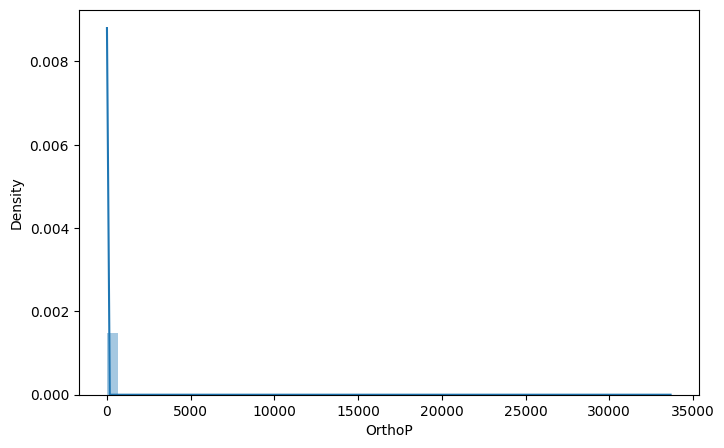

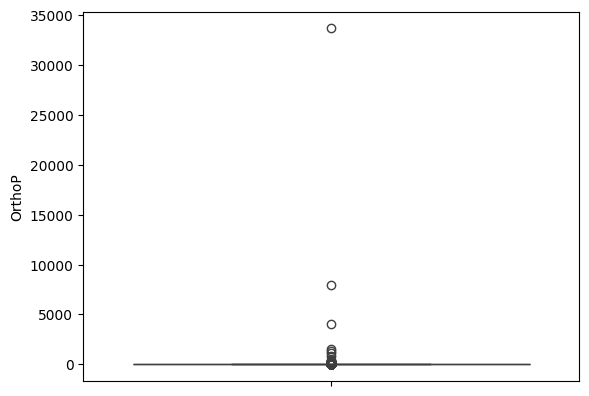

In [39]:
plt.figure(figsize=(8,5))
#plt.subplot(1,1,1)
sns.distplot(df['OrthoP'])
#plt.subplot(1,2,2)
#sns.distplot(df['placement_exam_marks'])
plt.show()

sns.boxplot(df['OrthoP'])
plt.show()

In [40]:
#Find IQR
#In a normal distribution, approximately 68% of the data falls within one standard deviation (sigma) of the mean, 
#approximately 95% falls within two standard deviations, and about 99.7% falls within three standard deviations;

percentile25 = df['OrthoP'].quantile(0.25)
percentile75 = df['OrthoP'].quantile(0.75)
iqr1 = percentile75 - percentile25
q1, q3 = np.percentile(df['OrthoP'], [25,75])
iqr = q3-q1
print("25th Percentile (q1): ", percentile25, q1, " | 75th Percentile (q3): ", percentile75, q3,  
      " | IQR (q3 - q1): ", iqr1, " | ", iqr) 

#Find Upper and Lower limits (3 Sigma)
upper_limit = percentile75 + 1.7 * iqr
lower_limit = percentile25 - 1.7 * iqr

#upper_limit = percentile75 + 1.5 * iqr
#lower_limit = percentile25 - 1.5 * iqr
print("Upper limit: ", upper_limit, " | Lower limit: ", lower_limit) 

print("=====================================================================================")
dfIQR = df[df['OrthoP'] <= upper_limit]
print("Outliers found on the Orthophosphate dataset and was removed using IQR Method")
print("Before Outlier Removal (Min-Max Range & Total): ", df['OrthoP'].min(), " | ", df['OrthoP'].max(), len(df))
print("After Outlier Removal (Min-Max Range & Total): ", dfIQR['OrthoP'].min(), " | ", dfIQR['OrthoP'].max(), len(dfIQR))
print(len(df)-len(dfIQR) , " Observations were found as Outlier and removed from the Training Dataset")

print("=====================================================================================")
dfSME = df[df['OrthoP']<=0.5] #This is the threshold set by water sme WRC/Nicolai discussion
print("Outliers found on the Orthophosphate dataset and was removed using SME Set Threashold")
print("Before Outlier Removal (Min-Max Range & Total): ", df['OrthoP'].min(), " | ", df['OrthoP'].max(), len(df))
print("After Outlier Removal (Min-Max Range & Total): ", dfSME['OrthoP'].min(), " | ", dfSME['OrthoP'].max(), len(dfSME))
print(len(df)-len(dfSME) , " Observations were found as Outlier and removed from the Training Dataset")

'''
25th Percentile (q1):  0.0 0.0  | 75th Percentile (q3):  0.0 0.0  | IQR (q3 - q1):  0.0  |  0.0
Upper limit:  0.0  | Lower limit:  0.0
=====================================================================================
Outliers found on the Orthophosphate dataset and was removed using IQR Method
Before Outlier Removal (Min-Max Range & Total):  0.0  |  33658.7825 9278441
After Outlier Removal (Min-Max Range & Total):  0.0  |  0.0 7908021
1370420  Observations were found as Outlier and removed from the Training Dataset
=====================================================================================
Outliers found on the Orthophosphate dataset and was removed using SME Set Threashold
Before Outlier Removal (Min-Max Range & Total):  0.0  |  33658.7825 9278441
After Outlier Removal (Min-Max Range & Total):  0.0  |  0.5 9067812
210629  Observations were found as Outlier and removed from the Training Dataset
1
'''
#History

25th Percentile (q1):  0.0 0.0  | 75th Percentile (q3):  0.0 0.0  | IQR (q3 - q1):  0.0  |  0.0
Upper limit:  0.0  | Lower limit:  0.0
Outliers found on the Orthophosphate dataset and was removed using IQR Method
Before Outlier Removal (Min-Max Range & Total):  0.0  |  33658.7825 9278441
After Outlier Removal (Min-Max Range & Total):  0.0  |  0.0 7908021
1370420  Observations were found as Outlier and removed from the Training Dataset
Outliers found on the Orthophosphate dataset and was removed using SME Set Threashold
Before Outlier Removal (Min-Max Range & Total):  0.0  |  33658.7825 9278441
After Outlier Removal (Min-Max Range & Total):  0.0  |  0.5 9067812
210629  Observations were found as Outlier and removed from the Training Dataset


'\n25th Percentile (q1):  0.0 0.0  | 75th Percentile (q3):  0.0 0.0  | IQR (q3 - q1):  0.0  |  0.0\nUpper limit:  0.0  | Lower limit:  0.0\n=====================================================================================\nOutliers found on the Orthophosphate dataset and was removed using IQR Method\nBefore Outlier Removal (Min-Max Range & Total):  0.0  |  33658.7825 9278441\nAfter Outlier Removal (Min-Max Range & Total):  0.0  |  0.0 7908021\n1370420  Observations were found as Outlier and removed from the Training Dataset\n=====================================================================================\nOutliers found on the Orthophosphate dataset and was removed using SME Set Threashold\nBefore Outlier Removal (Min-Max Range & Total):  0.0  |  33658.7825 9278441\nAfter Outlier Removal (Min-Max Range & Total):  0.0  |  0.5 9067812\n210629  Observations were found as Outlier and removed from the Training Dataset\n1\n\n'

In [41]:
#df = dfIQR.copy() # This is the IQR threashold
df = dfSME.copy() #This is the threshold set by water sme WRC/Nicolai discussion

print(len(dfAll.columns), len(dfSME.columns), len(dfIQR.columns), len(df))
df.head(2)

#972 52 52 9067812

972 52 52 9067812


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,82,68,OrthoP,Phosphate,Phosphorus
sampleDateOnly,,,,,,,,,,,
2000-01-01,AN-70561033,489852,289360,24,28,...,0.0,0.0,0.0,0.0,0.0
2000-01-01,AN-70561033,489852,289360,24,54,...,0.0,0.0,0.0,0.0,0.0


In [42]:
'''
dfOutlier = dfAll[dfAll['OrthoP']>=0.7262500000000001]
dfOutlier.head(10)
dfOutlier.to_csv('../NW_DataPP/16_NB_Pred_Pt2_v9_OrthoAll_SpatioTemp_Andrew.csv', index=True)
'''

"\ndfOutlier = dfAll[dfAll['OrthoP']>=0.7262500000000001]\ndfOutlier.head(10)\ndfOutlier.to_csv('../NW_DataPP/16_NB_Pred_Pt2_v9_OrthoAll_SpatioTemp_Andrew.csv', index=True)\n"

In [43]:
del(dfSME, dfIQR, dfAll)

In [45]:
#Giving a label to the Determinand Notation
#if (read_file_name == "12_NB_10Transpose_2959_All2_With_R_Mon.csv"):
if (read_file_name == "08_nb_transpose_2959_all2_with_r_mon.csv"):
    df = df.rename(columns={'116':'116_N Oxidised_UnC', '111':'111_Ammonia(N)_UnC', 
                            '117':'117_Nitrate-N_UnC','118':'118_Nitrite-N_UnC', 
                            '119':'119_NH3 un-ion_Section82','9924':'9924_Oxygen Diss_Section82', 
                            '162':'162_Alky pH 4.5_UnS','85':'85_BOD ATU_UnC',
                            '135':'135_Sld Sus@105C_UnC','172':'172_Chloride Ion_UnC', 
                            '241':'241_Calcium - Ca_UnC','237':'237_Magnesium-Mg_UnC', 
                            '158':'158_Hardness_UnC','182':'182_SiO2 Rv_UnC', 
                            '211':'211_Potassium- K_UnC', '3683':'3683_N Inorganic_UnC', 
                            '9686':'9686_Nitrogen - N_UnC','114':'114_N-Kjeldahl_UnC', 
                            #'192':'192_Phosphate_UnC', '348':'348_Phosphorus-P_UnC',
                            '113':'113_N Organic_UnC','76':'76_Temp Water_Section82', 
                            '301':'301_C - Org Filt_UnC', '61':'61_pH_Section82', 
                            '9901':'9901_O Diss %sat_Section82','183':'183_Sulphate SO4_UnC',
                            '143':'143_Sld NV@500C_UnC','461':'461_DtrgtAncSyn_UnC', 
                            '207':'207_Sodium - Na_UnC','463':'463_Dtrgt NncSyn_UnC',
                            '177':'177_Fluoride - F_UnC', '77':'77_Cond @ 25C_UnC',
                            '6450':'6450_Cu Filtered_UnC','6455':'6455_Zinc - as Zn_UnC',
                            '749':'749_Phenols Mono_UnC', '209':'209_K- Filtered_UnC',
                            '205':'205_Na- Filtered_UnC','9856':'9856_OrthophsFilt_UnC',
                            '7859':'7859_SO4dis_UnC', '1183':'1183_WethPresPrec_UnC',
                            '239':'239_Ca Filtered_UnC','175':'175_Cyanide - CN_UnC',
                            '235':'235_Mg Filtered_UnC', '1181':'1181_WethPresTemp_UnC',
                            '82':'82_O Dissolved_Section82'})
else:
    #df = df.rename(columns={'117' : 'Nitrate_117', '118' : 'Nitrite_118', '119' : 'Ammonia_S82_119', '9924' : 'OxygenDissolved_S82_9924', '241' : 'Calcium_241', 
    #                    '237' : 'Magnesium_237', '158' : 'HardnessCACO3_158', '211' : 'Potassium_211', '76' : 'WaterTemp_S82_76', '301' : 'CarbonOrgFilt_301', 
    #                    '9901' : 'OxygenDissolvedSaturationPC_S82_9901', '207' : 'Sodium_207', '463' : 'DetergentsNonIonic_463', '77' : 'Conductivityat25_77', 
    #                    '6450' : 'CopperDissolved_6450', '6455' : 'Zinc_6455', '7859' : 'SulphateDissolved_7859', '1183' : 'WeatherPrecipitation_1183', 
    #                    '1181' : 'WeatherTemp_1181', '82' : 'Oxygen_DissolvedLab_S82_82', '6528' : 'WeatherVisibility_6528', '163' : 'HardnessCalcium_163',
    #                    '6529' : 'WeatherPrecipitation7Days_6529', '6452' : 'Copper_6452', '6530' : 'WeatherTemp7Days_6530', '6460' : 'IronDissolved_6460', 
    #                    '3410' : 'NickelDissolved_3410', '52' : 'LeadDissolved_52', '6531' : 'WeatherVisibility7Days_6531', '3408' : 'ZincDissolved_3408', 
    #                    '108' : 'Cadmium_108', '3409' : 'ChromiumDissolved_3409', '7887' : 'ChlorophylExtract_7887', '50' : 'Lead_50', '6462' : 'Nickel_6462',
    #                    '3164' : 'Chromium_3164', '106' : 'CadmiumDissolved_106', '164' : 'HardnessMagnesium_164', '6051' : 'Iron_6051', '460' : 'DetergentsAnioniNIonic_460',
    #                    '186' : 'Thiocyanate_186', '6458' : 'MaganeseDissolved_6458', '105' : 'Mercury_105', '6045' : 'ArsenicDissolved_6045', 
    #                    '2348' : 'EcoliCMF_2348', '6050' : 'Maganese_6050', '68' : 'Turbidity_S82_68'})
    print("Yet to be renamed")

/var/tmp/ipykernel_17138/3082173078.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OrthoP'])


<Axes: ylabel='OrthoP'>

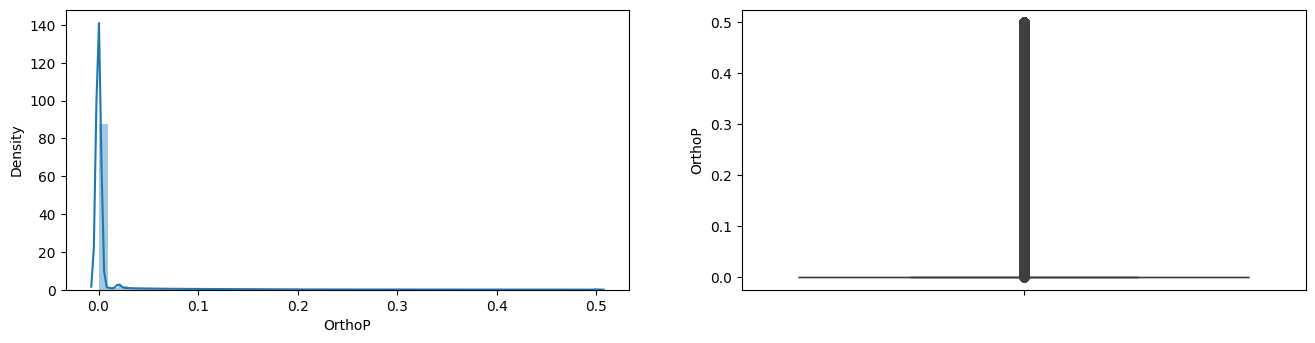

In [46]:
#Density and box plots
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['OrthoP'])
plt.subplot(2,2,2)
sns.boxplot(df['OrthoP'])

#plt.subplot(2,2,3)
#sns.distplot(new_df['Phosphate'])
#plt.subplot(2,2,4)
#sns.boxplot(new_df['Phosphate'])
#plt.show()

In [47]:
'''
dftemp = df.drop('samplingPoint_notation', axis=1)

Spearman_corr_OrthoP = dftemp.corr(method='spearman')["OrthoP"].drop("OrthoP")
Spearman_corr_OrthoP = Spearman_corr_OrthoP.rename("spearman_OrthoP")
#Spearman_corr_OrthoP = data.corr(method='spearman')["OrthoP"].drop("OrthoP")
#Spearman_corr_OrthoP = Spearman_corr_OrthoP.rename("spearman_OrthoP")

Pearson_corr_OrthoP = dftemp.corr(method='pearson')["OrthoP"].drop("OrthoP")
Pearson_corr_OrthoP = Pearson_corr_OrthoP.rename("pearson_OrthoP")

# Display the correlations
Corr_OrthoP = []
Corr_OrthoP = pd.concat([Pearson_corr_OrthoP, Spearman_corr_OrthoP], axis=1)
#Corr_OrthoP = Corr_OrthoP.rename({0: 'determinand_notation'}, axis=0) 
Corr_OrthoP.index.name = 'determinand_notation'
Corr_OrthoP.head(2)
'''

'\ndftemp = df.drop(\'samplingPoint_notation\', axis=1)\n\nSpearman_corr_OrthoP = dftemp.corr(method=\'spearman\')["OrthoP"].drop("OrthoP")\nSpearman_corr_OrthoP = Spearman_corr_OrthoP.rename("spearman_OrthoP")\n#Spearman_corr_OrthoP = data.corr(method=\'spearman\')["OrthoP"].drop("OrthoP")\n#Spearman_corr_OrthoP = Spearman_corr_OrthoP.rename("spearman_OrthoP")\n\nPearson_corr_OrthoP = dftemp.corr(method=\'pearson\')["OrthoP"].drop("OrthoP")\nPearson_corr_OrthoP = Pearson_corr_OrthoP.rename("pearson_OrthoP")\n\n# Display the correlations\nCorr_OrthoP = []\nCorr_OrthoP = pd.concat([Pearson_corr_OrthoP, Spearman_corr_OrthoP], axis=1)\n#Corr_OrthoP = Corr_OrthoP.rename({0: \'determinand_notation\'}, axis=0) \nCorr_OrthoP.index.name = \'determinand_notation\'\nCorr_OrthoP.head(2)\n'

In [48]:
'''
#Corr_OrthoP.index
#Corr_OrthoP = Corr_OrthoP.rename({0: 'determinand_notation'}, axis=0)  
Corr_OrthoP.index.name = 'determinand_notation'
Corr_OrthoP.head(2)
#Corr_OrthoP.to_csv('../NW_DataPP/16_NB_Pred_Pt2_v9_OrthoAll_SpatioTemp_Corr.csv', index=True)
'''

"\n#Corr_OrthoP.index\n#Corr_OrthoP = Corr_OrthoP.rename({0: 'determinand_notation'}, axis=0)  \nCorr_OrthoP.index.name = 'determinand_notation'\nCorr_OrthoP.head(2)\n#Corr_OrthoP.to_csv('../NW_DataPP/16_NB_Pred_Pt2_v9_OrthoAll_SpatioTemp_Corr.csv', index=True)\n"

In [49]:
from itertools import chain
full_list = list(chain(First_18_Pearson_Pt, 
                       Section_82_Yes,
                       altitude, temperature, 
                       orthoP, orthoPLike,
                       Phosphate, PhophateLike))
full_list = list(dict.fromkeys(full_list))

#data = dftemp[dftemp.determinand_notation.isin(full_list)]
data = df
#del (df)

In [50]:
print(
    data['OrthoP'][data['OrthoP']==0.0].count(),
    data['OrthoP'][data['OrthoP']==0].count(),
    data['OrthoP'][data['OrthoP']=='0'].count(),
    data['OrthoP'][data['OrthoP']=='0.0'].count(),
    data['OrthoP'][data['OrthoP']==''].count(),
    data['OrthoP'][data['OrthoP'].isna()].count(),
    data['OrthoP'][data['OrthoP'].isnull()].count()
)

#7908021 7908021 0 0 0 0 0

7908021 7908021 0 0 0 0 0


In [51]:
'''
# This is a Test code - For filtering the determinands that are having a correlation from 25% to 95%
# Get correlation matrix 
datac = data.drop(columns=['samplingPoint_notation'])
corr = datac.corr()
#print (corr)

# Create a mask for values above 90% 
# But also below 100% since it variables correlated with the same one
mask = (abs(datac.corr()) <= 0.95) & (abs(datac.corr()) > 0.25)
high_corr = corr[mask]
print ("Total number of features selected: ", len(high_corr))

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()
#print(col_to_filter_out)

# Apply new mask
X_clean = datac[high_corr.columns[col_to_filter_out]]

# Visualize cleaned dataset
print(len(X_clean.columns))
X_clean.head(2)
'''

'\n# This is a Test code - For filtering the determinands that are having a correlation from 25% to 95%\n# Get correlation matrix \ndatac = data.drop(columns=[\'samplingPoint_notation\'])\ncorr = datac.corr()\n#print (corr)\n\n# Create a mask for values above 90% \n# But also below 100% since it variables correlated with the same one\nmask = (abs(datac.corr()) <= 0.95) & (abs(datac.corr()) > 0.25)\nhigh_corr = corr[mask]\nprint ("Total number of features selected: ", len(high_corr))\n\n# Create a new column mask using any() and ~\ncol_to_filter_out = ~high_corr[mask].any()\n#print(col_to_filter_out)\n\n# Apply new mask\nX_clean = datac[high_corr.columns[col_to_filter_out]]\n\n# Visualize cleaned dataset\nprint(len(X_clean.columns))\nX_clean.head(2)\n'

In [52]:
#Find sum of non-zero values
#print(print(np.count_nonzero(data==0)))
'''
num=0
total_len = len(data)
for i in data.columns:
    num += data[i][data[i]==0].count()
    count_of_zero = total_len - data[i][data[i]==0].count()
    #print (data[i].name, ' | ', count_of_zero)
    if (i==192):
        print (i, ' | ', count_of_zero)
#num
len(data)
'''
find_non_zero(data)

In [53]:
#duplicate_cols = data.columns[data.columns.duplicated()]
#print("before duplicate removal:", duplicate_cols)
#data = data.loc[~data.index.duplicated(),:]
#print("after duplicate removal:", data.columns[data.columns.duplicated()])

In [54]:
#data.columns[data.columns.duplicated()]
#data.drop(columns=['Phosphate', 'Phosphorus'], axis=1, inplace=True)
#data.columns[data.columns.duplicated()]

In [56]:
#function to save encldoed labels into a pickle file
def train_and_save_encoders(data, categorical_columns, save_path='encoders'):
    """
    Train and save individual label encoders for each categorical column
    """
    import joblib
    encoders = {}
    save_path = "..//03_prediction_model/pkls"
   
    for col in categorical_columns:
        # Create and fit encoder
        le = LabelEncoder()
        data[col+"_label"] = le.fit_transform(data[col])
       
        # Save encoder to individual file
        encoder_path = f'{save_path}/encoder_{col}.pkl'
        joblib.dump(le, encoder_path)
        encoders[col] = encoder_path
       
    return data, encoders

In [59]:
data['samplingPoint_notation'].nunique()
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
#data['samplingPoint_notation_label'] = labelencoder.fit_transform(data['samplingPoint_notation']) #fitting and transforming the desired categorical column.

#Save Encoders into Pickle file
# List of categorical columns to encode
categorical_cols = ['samplingPoint_notation']

# Process data and save encoders
data, encoder_paths = train_and_save_encoders(data, categorical_cols)

#data_refSamplingPointNot = data.drop_duplicates(subset=['samplingPoint_notation_label'])[['samplingPoint_notation','samplingPoint_notation_label']]

data.head(2)


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,82_O Dissolved_Section82,68,OrthoP,Phosphate,Phosphorus
sampleDateOnly,,,,,,,,,,,
2000-01-01,748,489852,289360,24,28,...,0.0,0.0,0.0,0.0,0.0
2000-01-01,748,489852,289360,24,54,...,0.0,0.0,0.0,0.0,0.0


In [60]:

#Create samplingPoint reference dataset for later reference
#samplingPoint_Ref = data[['samplingPoint_notation','samplingPoint_notation_label', 
#                          'samplingPoint_easting','samplingPoint_northing']] #Commented on 16 May 2025

samplingPoint_Ref = data[['samplingPoint_notation', 
                          'samplingPoint_easting','samplingPoint_northing']]  #Added on 16 May 2025

#data = data.drop(columns=['samplingPoint_notation'])
samplingPoint_Ref.head(2)


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing
sampleDateOnly,,,
2000-01-01,748,489852,289360
2000-01-01,748,489852,289360


In [61]:
'''
#Let us look at one year of data for seasonality
#series = data.query("sampleDateOnly < 2000-12-30")['76']
#series = data.loc[data.index.dt.year == '2000']
startdate = pd.to_datetime("2000-01-01").date()
enddate = pd.to_datetime("2001-01-01").date()
print(startdate, enddate)
series = data.loc[startdate : enddate]

series.head(2)
'''

'\n#Let us look at one year of data for seasonality\n#series = data.query("sampleDateOnly < 2000-12-30")[\'76\']\n#series = data.loc[data.index.dt.year == \'2000\']\nstartdate = pd.to_datetime("2000-01-01").date()\nenddate = pd.to_datetime("2001-01-01").date()\nprint(startdate, enddate)\nseries = data.loc[startdate : enddate]\n\nseries.head(2)\n'

In [62]:
'''
#Additive Check for the Temporal values
#from statsmodels.tsa.seasonal import seasonal_decompose
series = data['76'] #Good
#series = data['1181'] #Better
#series = data['3026'] #Best
startdate = pd.to_datetime("2000-01-01").date()
enddate = pd.to_datetime("2001-12-30").date()
series = series.loc[startdate : enddate]
series = data.query("sampleDateOnly < '2000-12-30'")['76']
result = seasonal_decompose(np.abs(series), model='additive', period=1)
result.plot()
plt.xticks(rotation=45)
plt.show()

#Multiplicative Check
series = series[(series[0:] > 0)]
result = seasonal_decompose(np.abs(series), model='multiplicative', period=1)
result.plot()
plt.xticks(rotation=45)
plt.show()

#Some seasonality exist with 76, 1181 and 3026 where 3026 shows best seasonlity visuals 
#Conclusion:- We can expose Temporals and the model shall be able to adapt more accurate results - 15 Mar 2025 
'''

'\n#Additive Check for the Temporal values\n#from statsmodels.tsa.seasonal import seasonal_decompose\nseries = data[\'76\'] #Good\n#series = data[\'1181\'] #Better\n#series = data[\'3026\'] #Best\nstartdate = pd.to_datetime("2000-01-01").date()\nenddate = pd.to_datetime("2001-12-30").date()\nseries = series.loc[startdate : enddate]\nseries = data.query("sampleDateOnly < \'2000-12-30\'")[\'76\']\nresult = seasonal_decompose(np.abs(series), model=\'additive\', period=1)\nresult.plot()\nplt.xticks(rotation=45)\nplt.show()\n\n#Multiplicative Check\nseries = series[(series[0:] > 0)]\nresult = seasonal_decompose(np.abs(series), model=\'multiplicative\', period=1)\nresult.plot()\nplt.xticks(rotation=45)\nplt.show()\n\n#Some seasonality exist with 76, 1181 and 3026 where 3026 shows best seasonlity visuals \n#Conclusion:- We can expose Temporals and the model shall be able to adapt more accurate results - 15 Mar 2025 \n'

In [63]:
type(data.index)

pandas.core.indexes.base.Index

In [64]:
#Exploiting Temporal characteristics for the Temperature data
print(type(data.index)) #It should display <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, If it does not then execute below 
data['datetimeforSeasonality'] = data.index
data.index =  pd.to_datetime(data.index)
print(type(data.index)) 

#data['datetimeforSeasonality'] = pd.to_datetime(data['datetimeforSeasonality'])
#print(type(data['datetimeforSeasonality']))
#data = data.drop(columns=['datetimeforSeasonality']) 


# Cyclical encoding
#data['day_sin'] = np.sin(2 * np.pi * data['day_of_month']/31)
#data['day_cos'] = np.cos(2 * np.pi * data['day_of_month']/31)
#data['day_sin'] = np.sin(2 * np.pi * data['month']/12)
#data['day_cos'] = np.cos(2 * np.pi * data['month']/12)

#Additional Temporal feature
#data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int) #Additional feature added to improve accuracy
#data['quarter'] = data['date'].dt.quarter #Additional feature added to improve accuracy
#data['year'] = data['date'].dt.year #Additional feature added to improve accuracy
#data['month'] = data['date'].dt.month
#data['quarter'] = data['date'].dt.quarter

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [65]:

#Seasonality for the determinand 8091-Temperature, measured in celcius
#Exploiting Temporal characteristics for the Temperature data

# Function to determine the season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Extracting the required information
data['Season'] = data.index.map(get_season)

data.head(2)


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,OrthoP,Phosphate,Phosphorus,datetimeforSeasonality,Season
sampleDateOnly,,,,,,,,,,,
2000-01-01,748,489852,289360,24,28,...,0.0,0.0,0.0,2000-01-01,Winter
2000-01-01,748,489852,289360,24,54,...,0.0,0.0,0.0,2000-01-01,Winter


In [66]:
#Exploiting Temporal characteristics for the Temperature data
data['Day_of_Month'] = data.index.day
data['Day_of_Week'] = data.index.day_name()
data['Month_of_Year'] = data.index.month_name()
data['Week_of_Year'] = data.index.isocalendar().week
data.head(2)

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,Season,Day_of_Month,Day_of_Week,Month_of_Year,Week_of_Year
sampleDateOnly,,,,,,,,,,,
2000-01-01,748,489852,289360,24,28,...,Winter,1,Saturday,January,52
2000-01-01,748,489852,289360,24,54,...,Winter,1,Saturday,January,52


In [67]:
print(len(samplingPoint_Ref), len(data))

#9067812 9067812

9067812 9067812


In [71]:
#Converting categorical data into numerical since Only numberical data is allowed for Scaling and Standardization 
#Season, Day_of_Week, Month_of_Year

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder

#Commented on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#data['Season_label'] = labelencoder.fit_transform(data['Season']) #fitting and transforming the desired categorical column.
#data['Day_of_Week_label'] = labelencoder.fit_transform(data['Day_of_Week']) #fitting and transforming the desired categorical column.
#data['Month_of_Year_label'] = labelencoder.fit_transform(data['Month_of_Year']) #fitting and transforming the desired categorical column.

#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#Save Encoders into Pickle file
# List of categorical columns to encode
categorical_cols = ['Season', 'Day_of_Week', 'Month_of_Year']

# Process data and save encoders
data, encoder_paths = train_and_save_encoders(data, categorical_cols)
#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.

#add the categorical variable into a reference dataset for later reference 
#Commented on 16 May 2025 as the encoder labels are created without the suffix of _label, instead it is created on the same column 
#names. Moreoever, the label codes are stored in a pickle file for later usage so getting rid of _Ref tables
#samplingPoint_Ref = samplingPoint_Ref.merge(data[['Season', 'Day_of_Week', 'Month_of_Year','Season_label', 'Day_of_Week_label','Month_of_Year_label']], 
#                                            left_index=True, right_index=True, how='left')
#samplingPoint_Ref.head(2)

#data = data.drop(columns=['Season', 'Day_of_Week', 'Month_of_Year', 'datetimeforSeasonality'])
data = data.drop(columns=['datetimeforSeasonality'])
data.head(2)


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,Season,Day_of_Month,Day_of_Week,Month_of_Year,Week_of_Year
sampleDateOnly,,,,,,,,,,,
2000-01-01,748,489852,289360,24,28,...,3,1,2,4,52
2000-01-01,748,489852,289360,24,54,...,3,1,2,4,52


In [72]:
#samplingPoint_Ref.head(2)

In [100]:
#data.columns

NameError: name 'data' is not defined

In [101]:
#gdf = gdf.drop(columns=['datetimeforSeasonality'])

In [74]:
transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326", always_xy=True) 
data['longitude'], data['latitude'] = transformer.transform(
    data['samplingPoint_easting'].values, data['samplingPoint_northing'].values)

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(
    data['longitude'], data['latitude']), crs='EPSG:4326')

gdf.head(2)

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,isComplianceSample_label,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,...,Phosphorus,datetimeforSeasonality,Season,Day_of_Month,Day_of_Week,Month_of_Year,Week_of_Year,longitude,latitude,geometry
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2000-01-01,748,489852,289360,24,28,0,2.1,13.0,0.0,0.0,...,0.0,2000-01-01,3,1,2,4,52,-0.677966,52.494758,POINT (-0.67797 52.49476)
2000-01-01,748,489852,289360,24,54,0,0.0,0.0,0.0,0.0,...,0.0,2000-01-01,3,1,2,4,52,-0.677966,52.494758,POINT (-0.67797 52.49476)


In [75]:

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder

#Commented on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#longitude - latitude - geometry
#gdf['longitude_label'] = labelencoder.fit_transform(gdf['longitude'])
#gdf['latitude_label'] = labelencoder.fit_transform(gdf['latitude'])
#gdf['geometry_label'] = labelencoder.fit_transform(gdf['geometry']) 


#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#Save Encoders into Pickle file
# List of categorical columns to encode
categorical_cols = ['longitude', 'latitude']

# Process data and save encoders
gdf, encoder_paths = train_and_save_encoders(gdf, categorical_cols)
#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.

#Commented on 16 May 2025 as the encoder labels are created without the suffix of _label, instead it is created on the same column 
#names. Moreoever, the label codes are stored in a pickle file for later usage so getting rid of _Ref tables
#data_refEastNorthLatLon = gdf.drop_duplicates(subset=['samplingPoint_notation'
#                                                     ])[['samplingPoint_notation', 'samplingPoint_easting', 'samplingPoint_northing',
#                                                         'longitude','latitude','longitude_label', 'latitude_label']]

gdf.head(2)


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,determinand_unit_name_label,...,Month_of_Year,Week_of_Year,longitude,latitude,geometry
sampleDateOnly,,,,,,,,,,,
2000-01-01,748,489852,289360,24,28,...,4,52,17072,11448,POINT (-0.67797 52.49476)
2000-01-01,748,489852,289360,24,54,...,4,52,17072,11448,POINT (-0.67797 52.49476)


In [102]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 9067812 entries, 2000-01-01 to 2024-06-05
Data columns (total 98 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   samplingPoint_notation          int64   
 1   samplingPoint_easting           int64   
 2   samplingPoint_northing          int64   
 3   purpose_name_label              int64   
 4   116_N Oxidised_UnC              float64 
 5   111_Ammonia(N)_UnC              float64 
 6   117_Nitrate-N_UnC               float64 
 7   118_Nitrite-N_UnC               float64 
 8   119_NH3 un-ion_Section82        float64 
 9   9924_Oxygen Diss_Section82      float64 
 10  162_Alky pH 4.5_UnS             float64 
 11  85_BOD ATU_UnC                  float64 
 12  135_Sld Sus@105C_UnC            float64 
 13  172_Chloride Ion_UnC            float64 
 14  241_Calcium - Ca_UnC            float64 
 15  237_Magnesium-Mg_UnC            float64 
 16  158_Hardness_UnC               

In [77]:
'''
#Method to diagnose Stationarity (applicablity for Linear models)
print("Visual Inspection:")
sns.pairplot(df, x_vars=X[:2], y_vars=y, kind='reg', height=4)
plt.show()
'''

'\n#Method to diagnose Stationarity (applicablity for Linear models)\nprint("Visual Inspection:")\nsns.pairplot(df, x_vars=X[:2], y_vars=y, kind=\'reg\', height=4)\nplt.show()\n'

In [78]:
#Fill all leading days zero value with the same until a day finding a valid value
#data = data.ffill(axis ='rows')
#data = df[full_list_30]
#data.fillna(method='pad', inplace=True)  # Forward fill
#data.fillna(method='bfill', inplace=True)  # Backward fill for the rest of the data where it still have zero values after forward fill

#find_non_zero(data) Pasu
listof_lt_100 = find_non_zero_lt_100(data)
print("Total number of columns have less than 100 observations: ", len(listof_lt_100), "Out of : ", len(data.columns))
listof_lt_100

#following are removed but they are section 82 parameters
# 9803, 9261, 8958, 7786, 7064, 6872, 5282

dataTuned = gdf.drop(columns=listof_lt_100) #Commented temporarily as this is not adding any value to the model accuracy

dataTuned.columns

Total number of columns have less than 100 observations:  0 Out of :  60


Index(['samplingPoint_notation', 'samplingPoint_easting',
       'samplingPoint_northing', 'purpose_name_label',
       'determinand_unit_name_label', 'isComplianceSample_label',
       '116_N Oxidised_UnC', '111_Ammonia(N)_UnC', '117_Nitrate-N_UnC',
       '118_Nitrite-N_UnC', '119_NH3 un-ion_Section82',
       '9924_Oxygen Diss_Section82', '162_Alky pH 4.5_UnS', '85_BOD ATU_UnC',
       '135_Sld Sus@105C_UnC', '172_Chloride Ion_UnC', '241_Calcium - Ca_UnC',
       '237_Magnesium-Mg_UnC', '158_Hardness_UnC', '182_SiO2 Rv_UnC',
       '211_Potassium- K_UnC', '3683_N Inorganic_UnC', '9686_Nitrogen - N_UnC',
       '114_N-Kjeldahl_UnC', '113_N Organic_UnC', '76_Temp Water_Section82',
       '301_C - Org Filt_UnC', '61_pH_Section82', '9901_O Diss %sat_Section82',
       '183_Sulphate SO4_UnC', '143_Sld NV@500C_UnC', '461_DtrgtAncSyn_UnC',
       '207_Sodium - Na_UnC', '463_Dtrgt NncSyn_UnC', '177_Fluoride - F_UnC',
       '6450_Cu Filtered_UnC', '6455_Zinc - as Zn_UnC', '749_Phenols Mono_

In [79]:
#fill in zeroes with previous readings
#altitude = [5]
#temperature = [22, 24, 76, 1181, 3026, 6530, 8091, 8918]

''' Commented on Mar 23 as this is suspected to introduce bias
data.replace(0, np.nan, inplace=True)
data.bfill(inplace=True)
data.ffill(inplace=True)
data.head(2)
'''

'''
dataTuned.replace(0, np.nan, inplace=True)
dataTuned.bfill(inplace=True)
dataTuned.ffill(inplace=True)
dataTuned.head(2)
''' 

'\ndataTuned.replace(0, np.nan, inplace=True)\ndataTuned.bfill(inplace=True)\ndataTuned.ffill(inplace=True)\ndataTuned.head(2)\n'

In [103]:
print(len(gdf.columns), gdf.columns) 
#61

98 Index(['samplingPoint_notation', 'samplingPoint_easting',
       'samplingPoint_northing', 'purpose_name_label', '116_N Oxidised_UnC',
       '111_Ammonia(N)_UnC', '117_Nitrate-N_UnC', '118_Nitrite-N_UnC',
       '119_NH3 un-ion_Section82', '9924_Oxygen Diss_Section82',
       '162_Alky pH 4.5_UnS', '85_BOD ATU_UnC', '135_Sld Sus@105C_UnC',
       '172_Chloride Ion_UnC', '241_Calcium - Ca_UnC', '237_Magnesium-Mg_UnC',
       '158_Hardness_UnC', '182_SiO2 Rv_UnC', '211_Potassium- K_UnC',
       '3683_N Inorganic_UnC', '9686_Nitrogen - N_UnC', '114_N-Kjeldahl_UnC',
       '113_N Organic_UnC', '76_Temp Water_Section82', '301_C - Org Filt_UnC',
       '61_pH_Section82', '9901_O Diss %sat_Section82', '183_Sulphate SO4_UnC',
       '143_Sld NV@500C_UnC', '461_DtrgtAncSyn_UnC', '207_Sodium - Na_UnC',
       '463_Dtrgt NncSyn_UnC', '177_Fluoride - F_UnC', '6450_Cu Filtered_UnC',
       '6455_Zinc - as Zn_UnC', '749_Phenols Mono_UnC', '209_K- Filtered_UnC',
       '205_Na- Filtered_UnC', '98

In [81]:
#!pip install cuml-cu12 --extra-index-url=https://pypi.nvidia.com
# or
#!conda install -c conda-forge cudf cuml

In [82]:
#Below conditional statement was added as With Reactive Monitoring has a superset of samples containing both
#With and Without Reactive monitoring dataset - April 09 2025 Begin
'''
Commented on 16 May 2025 as _ref tables that contains Encoder info are now converted as .pkl files 
if (read_file_name == "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    savedata(data_refSamplingPointNot, "16_NB_Pred_Pt2_v91T_UniqSamplingPoints.csv", 'gcs://rdmai_dev_data/NW_Final/')
    savedata(data_refEastNorthLatLon, "16_NB_Pred_Pt2_v91T_UniqEastNorthLatLon.csv", 'gcs://rdmai_dev_data/NW_Final/')
#Below conditional statement was added as With Reactive Monitoring has a superset of samples containing both
#With and Without Reactive monitoring dataset - April 09 2025 End


print(len(data_refSamplingPointNot))
print(len(data_refEastNorthLatLon))
'''
data['samplingPoint_notation'].nunique()

#22991
#22991
#22991

22991

In [83]:
#Release memory for the modeling operations
#del(data, samplingPoint_Ref, data_refSamplingPointNot, data_refEastNorthLatLon, dataTuned)
del(data, samplingPoint_Ref, dataTuned)

In [84]:
#Negative OrthoP values check
print(len(gdf[gdf['OrthoP']<0]))
#gdf.drop(gdf[gdf['OrthoP'] < 24000].index, inplace = True)

#0

0


In [95]:
print("Pre Dummy Creation: ", len(gdf))
gdf = pd.get_dummies(gdf, columns=['isComplianceSample_label'], dtype='int')
gdf = pd.get_dummies(gdf, columns=['determinand_unit_name_label'], dtype='int')
print("Post Dummy Creation: ", len(gdf))

#Pre Dummy Creation:  9067812
#Post Dummy Creation:  9067812

Pre Dummy Creation:  9067812


KeyError: "None of [Index(['isComplianceSample_label'], dtype='object')] are in the [columns]"

In [96]:
gdf.head(2)

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,116_N Oxidised_UnC,...,determinand_unit_name_label_61,determinand_unit_name_label_64,determinand_unit_name_label_65,determinand_unit_name_label_66,determinand_unit_name_label_67
sampleDateOnly,,,,,,,,,,,
2000-01-01,748,489852,289360,24,2.1,...,0,0,0,0,0
2000-01-01,748,489852,289360,24,0.0,...,0,0,0,0,0


In [104]:
# Split data into features (X) and target (y)
#X = gdf.drop(columns=['OrthoP', 'geometry',
#                      'longitude', 'latitude', 'samplingPoint_notation'])  # Replace 'OrthoP' with your target column

X = gdf.drop(columns=['OrthoP', 'geometry'])  # Replace 'OrthoP' with your target column
y = gdf['OrthoP']

#y.head(2)
#gdf.head(2)
#X.head(2)

In [105]:
#Validate dataset Creation | Split data into features (X_valid) and target (y_valid)

#Nicolai -https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true
#Sampling point NE-44400163 easting northing: 420190 542201 | Northumberland Durham And Tees | Sub-Area	Wear & Tees | Yr: 2000-2024
#Determinand_unit_name_label 28 is for Orthophosphate unit measure mg/l
validation_gdf = gdf[(gdf['determinand_unit_name_label_28']==1) & (gdf['samplingPoint_easting'] == 420190)]
#X_valid = validation_gdf.drop(columns=['OrthoP', 'geometry',
#                      'longitude', 'latitude', 'samplingPoint_notation'])  # Replace 'OrthoP' with your target column

X_valid = validation_gdf.drop(columns=['OrthoP', 'geometry'])  # Replace 'OrthoP' with your target column

y_valid = validation_gdf['OrthoP']

print (len(validation_gdf), len(X_valid), len(y_valid))

#197 197 197

197 197 197


In [106]:
'''
#Old logic to filter X_valid, y_valid and then the dummy value creation for X 
print("Pre Dummy Creation: ", len(gdf))
X = pd.get_dummies(X, columns=['isComplianceSample_label'], dtype='int')
X = pd.get_dummies(X, columns=['determinand_unit_name_label'], dtype='int')

#for the Sampling point 'NE-44400163', the applicable eastings and northings are 420190 , 542201
#https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true (200 samples taken between 2021 and 2000)
X_valid = pd.get_dummies(X, columns=['isComplianceSample_label'], dtype='int')
X_valid = pd.get_dummies(X, columns=['determinand_unit_name_label'], dtype='int')

#TESTING DUMMY VARIABLES OF DETERMINAND UNIT NAME's INFLUENCE TO OrthoP - BEGIN
#X=df.drop(['Salary'],axis=1)
#calculate_vif(X_test)
#print(X_train.info(), X_test.info())
#print(len(X_train), len(X_test))
#TESTING DUMMY VARIABLES OF DETERMINAND UNIT NAME's INFLUENCE TO OrthoP - END

print("Post Dummy Creation: ", len(X))
print(len(validation_gdf), len(X_valid), len(y_valid))
X.head(2)
'''

'\n#Old logic to filter X_valid, y_valid and then the dummy value creation for X \nprint("Pre Dummy Creation: ", len(gdf))\nX = pd.get_dummies(X, columns=[\'isComplianceSample_label\'], dtype=\'int\')\nX = pd.get_dummies(X, columns=[\'determinand_unit_name_label\'], dtype=\'int\')\n\n#for the Sampling point \'NE-44400163\', the applicable eastings and northings are 420190 , 542201\n#https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true (200 samples taken between 2021 and 2000)\nX_valid = pd.get_dummies(X, columns=[\'isComplianceSample_label\'], dtype=\'int\')\nX_valid = pd.get_dummies(X, columns=[\'determinand_unit_name_label\'], dtype=\'int\')\n\n#TESTING DUMMY VARIABLES OF DETERMINAND UNIT NAME\'s INFLUENCE TO OrthoP - BEGIN\n#X=df.drop([\'Salary\'],axis=1)\n#calculate_vif(X_test)\n#print(X_train.info(), X_test.info())\n#print(len(X_train), len(X_test))\n#TESTING DUMMY VARIABLES OF DETERMINAND UNIT NAME\'s INFLUENCE TO OrthoP - END\n\nprint("Post Dum

In [107]:
#resdf = pd.merge(X_valid, y_valid, on=y_valid.index)
#resdf.reset_index()

In [108]:
#print(len(validation_gdf))
#validation_gdf['OrthoP'].head(10)
#validation_gdf.to_csv("../NW_DataPP/ValidationData_SP_NE-44400163.csv")

In [109]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#print(X_train.size, X_test.size, y_train.size, y_test.size, X_valid.size, y_valid.size)
#print(len(X_train.columns), len(X_test.columns), len(y_train.columns), len(y_test.columns), len(X_valid.columns), len(y_valid.columns))
print(len(X_train), len(X_test), len(y_train), len(y_test), len(X_valid), len(y_valid))
print()

#8161030 906782 8161030 906782 197 197

8161030 906782 8161030 906782 197 197



In [110]:
print(len(X_train), len(X_test), len(y_train), len(y_test), len(X_valid), len(y_valid))
print (len(X_test.columns), len(X_valid.columns), X_test.columns, X_valid.columns)

#8161030 906782 8161030 906782 197 197
#96 96

8161030 906782 8161030 906782 197 197
96 96 Index(['samplingPoint_notation', 'samplingPoint_easting',
       'samplingPoint_northing', 'purpose_name_label', '116_N Oxidised_UnC',
       '111_Ammonia(N)_UnC', '117_Nitrate-N_UnC', '118_Nitrite-N_UnC',
       '119_NH3 un-ion_Section82', '9924_Oxygen Diss_Section82',
       '162_Alky pH 4.5_UnS', '85_BOD ATU_UnC', '135_Sld Sus@105C_UnC',
       '172_Chloride Ion_UnC', '241_Calcium - Ca_UnC', '237_Magnesium-Mg_UnC',
       '158_Hardness_UnC', '182_SiO2 Rv_UnC', '211_Potassium- K_UnC',
       '3683_N Inorganic_UnC', '9686_Nitrogen - N_UnC', '114_N-Kjeldahl_UnC',
       '113_N Organic_UnC', '76_Temp Water_Section82', '301_C - Org Filt_UnC',
       '61_pH_Section82', '9901_O Diss %sat_Section82', '183_Sulphate SO4_UnC',
       '143_Sld NV@500C_UnC', '461_DtrgtAncSyn_UnC', '207_Sodium - Na_UnC',
       '463_Dtrgt NncSyn_UnC', '177_Fluoride - F_UnC', '6450_Cu Filtered_UnC',
       '6455_Zinc - as Zn_UnC', '749_Phenols Mono_UnC', '209_K- Filtered

In [111]:
# Train-test split Pasu to resume 17 Apr 2025
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from itertools import chain
full_list = list(chain(Section_82_Yes,
                       altitude, temperature
                      ))
full_list = list(dict.fromkeys(full_list))

 
# '85':'85_BOD ATU_Unclassified', '135':'135_Sld Sus@105C_Unclassified',
# '172':'172_Chloride Ion_Unclassified', '241':'241_Calcium - Ca_Unclassified',
# '237':'237_Magnesium-Mg_Unclassified', '158':'158_Hardness_Unclassified',
# '182':'182_SiO2 Rv_Unclassified', '211':'211_Potassium- K_Unclassified', 
# '3683':'3683_N Inorganic_Unclassified', '9686':'9686_Nitrogen - N_Unclassified',
# #'192':'192_Phosphate_Unclassified', '348':'348_Phosphorus-P_Unclassified',
# '114':'114_N-Kjeldahl_Unclassified', '113':'113_N Organic_Unclassified',
# '301':'301_C - Org Filt_Unclassified', 
# '183':'183_Sulphate SO4_Unclassified', '143':'143_Sld NV@500C_Unclassified',
# '461':'461_DtrgtAncSyn_Unclassified', '207':'207_Sodium - Na_Unclassified',
# '463':'463_Dtrgt NncSyn_Unclassified', '177':'177_Fluoride - F_Unclassified',
# '6450':'6450_Cu Filtered_Unclassified', 
# '6455':'6455_Zinc - as Zn_Unclassified', '749':'749_Phenols Mono_Unclassified', 
# '209':'209_K- Filtered_Unclassified', '205':'205_Na- Filtered_Unclassified', 
# '9856':'9856_OrthophsFilt_Unclassified', '7859':'7859_SO4dis_Unclassified', 
# '1183':'1183_WethPresPrec_Unclassified', '239':'239_Ca Filtered_Unclassified',
# '175':'175_Cyanide - CN_Unclassified', '235':'235_Mg Filtered_Unclassified', 
# '1181':'1181_WethPresTemp_Unclassified', '82':'82_O Dissolved_Yes'})

#VALIDATION DATASET's FEATURES FILTERING STEP **This should be modified according to the Sampling point input to be validate
#Nicolai -https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true
#Sampling point NE-44400163 easting northing: 420190 542201 | Northumberland Durham And Tees | Sub-Area	Wear & Tees | Yr: 2000-2024
validation_feat_imp_with_r_mon = ['samplingPoint_notation_label', 'samplingPoint_northing', 'samplingPoint_easting','longitude_label', 
                                  'determinand_unit_name_label',
                                  'latitude_label','purpose_name_label','Week_of_Year',
                                  'Month_of_Year_label','Season_label','Day_of_Month','Day_of_Week_label',
                                  '116_N Oxidised_UnC',
                                  '117_Nitrate-N_UnC',
                                  '118_Nitrite-N_UnC',
                                  '119_NH3 un-ion_Section82',
                                  '111_Ammonia(N)_UnC', 
                                  '9924_Oxygen Diss_Section82',
                                  '162_Alky pH 4.5_UnS',
                                  '61_pH_Section82',
                                  '9901_O Diss %sat_Section82',
                                  '76_Temp Water_Section82',
                                  '77_Cond @ 25C_UnC',
                                  'isComplianceSample_label_0', 'isComplianceSample_label_1',
                                  'determinand_unit_name_label_0', 'determinand_unit_name_label_1', 
                                  'determinand_unit_name_label_2', 'determinand_unit_name_label_3', 
                                  'determinand_unit_name_label_4', 'determinand_unit_name_label_5', 
                                  'determinand_unit_name_label_6', 'determinand_unit_name_label_7',
                                  'determinand_unit_name_label_8', 'determinand_unit_name_label_9',
                                  'determinand_unit_name_label_10', 'determinand_unit_name_label_11',
                                  'determinand_unit_name_label_12', 'determinand_unit_name_label_13',
                                  'determinand_unit_name_label_14', 'determinand_unit_name_label_15',
                                  'determinand_unit_name_label_16', 'determinand_unit_name_label_17',
                                  'determinand_unit_name_label_18', 'determinand_unit_name_label_19',
                                  'determinand_unit_name_label_20', 'determinand_unit_name_label_21',
                                  'determinand_unit_name_label_22', 'determinand_unit_name_label_23',
                                  'determinand_unit_name_label_24', 'determinand_unit_name_label_25',
                                  'determinand_unit_name_label_26', 'determinand_unit_name_label_27', 
                                  'determinand_unit_name_label_28', 'determinand_unit_name_label_29',
                                  'determinand_unit_name_label_30', 'determinand_unit_name_label_31',
                                  'determinand_unit_name_label_32', 'determinand_unit_name_label_33',
                                  'determinand_unit_name_label_34', 'determinand_unit_name_label_35',
                                  'determinand_unit_name_label_36', 'determinand_unit_name_label_37',
                                  'determinand_unit_name_label_38', 'determinand_unit_name_label_39',
                                  'determinand_unit_name_label_40', 'determinand_unit_name_label_41',
                                  'determinand_unit_name_label_42', 'determinand_unit_name_label_43',
                                  'determinand_unit_name_label_44', 'determinand_unit_name_label_45',
                                  'determinand_unit_name_label_46', 'determinand_unit_name_label_47',
                                  'determinand_unit_name_label_48', 'determinand_unit_name_label_49',
                                  'determinand_unit_name_label_50', 'determinand_unit_name_label_51',
                                  'determinand_unit_name_label_52', 'determinand_unit_name_label_53',
                                  'determinand_unit_name_label_54', 'determinand_unit_name_label_55',
                                  'determinand_unit_name_label_56', 'determinand_unit_name_label_57',
                                  'determinand_unit_name_label_58', 'determinand_unit_name_label_59',
                                  'determinand_unit_name_label_60', 'determinand_unit_name_label_61',
                                  'determinand_unit_name_label_62'
                                 ]


#Introduced to keep all the values for Section_83 parameters and make it a zero value for everything else
for col in X_test.columns:
    if col not in validation_feat_imp_with_r_mon:
        X_test[col].values[:] = 0
        X_valid[col].values[:] = 0
        #print(col)
    else:
        print(col)
X_test.columns

samplingPoint_easting
samplingPoint_northing
purpose_name_label
116_N Oxidised_UnC
111_Ammonia(N)_UnC
117_Nitrate-N_UnC
118_Nitrite-N_UnC
119_NH3 un-ion_Section82
9924_Oxygen Diss_Section82
162_Alky pH 4.5_UnS
76_Temp Water_Section82
61_pH_Section82
9901_O Diss %sat_Section82
Day_of_Month
Week_of_Year
isComplianceSample_label_0
isComplianceSample_label_1
determinand_unit_name_label_0
determinand_unit_name_label_3
determinand_unit_name_label_4
determinand_unit_name_label_5
determinand_unit_name_label_6
determinand_unit_name_label_8
determinand_unit_name_label_10
determinand_unit_name_label_11
determinand_unit_name_label_12
determinand_unit_name_label_13
determinand_unit_name_label_14
determinand_unit_name_label_15
determinand_unit_name_label_16
determinand_unit_name_label_17
determinand_unit_name_label_18
determinand_unit_name_label_19
determinand_unit_name_label_20
determinand_unit_name_label_25
determinand_unit_name_label_27
determinand_unit_name_label_28
determinand_unit_name_label_3

Index(['samplingPoint_notation', 'samplingPoint_easting',
       'samplingPoint_northing', 'purpose_name_label', '116_N Oxidised_UnC',
       '111_Ammonia(N)_UnC', '117_Nitrate-N_UnC', '118_Nitrite-N_UnC',
       '119_NH3 un-ion_Section82', '9924_Oxygen Diss_Section82',
       '162_Alky pH 4.5_UnS', '85_BOD ATU_UnC', '135_Sld Sus@105C_UnC',
       '172_Chloride Ion_UnC', '241_Calcium - Ca_UnC', '237_Magnesium-Mg_UnC',
       '158_Hardness_UnC', '182_SiO2 Rv_UnC', '211_Potassium- K_UnC',
       '3683_N Inorganic_UnC', '9686_Nitrogen - N_UnC', '114_N-Kjeldahl_UnC',
       '113_N Organic_UnC', '76_Temp Water_Section82', '301_C - Org Filt_UnC',
       '61_pH_Section82', '9901_O Diss %sat_Section82', '183_Sulphate SO4_UnC',
       '143_Sld NV@500C_UnC', '461_DtrgtAncSyn_UnC', '207_Sodium - Na_UnC',
       '463_Dtrgt NncSyn_UnC', '177_Fluoride - F_UnC', '6450_Cu Filtered_UnC',
       '6455_Zinc - as Zn_UnC', '749_Phenols Mono_UnC', '209_K- Filtered_UnC',
       '205_Na- Filtered_UnC', '9856_

In [112]:
# --- LightGBM ---
print("\nTraining LightGBM...")
showtime()
import lightgbm as lgbfeat
lightGBM_model = lgbfeat.LGBMRegressor(importance_type='gain')
lightGBM_model.fit(X_train, y_train)
#lightGBM_model.fit(X_train_scaled, y_train)

lightGBM_predictions = evaluate_model_adv(lightGBM_model, X_test, y_test, "LightGBM") 
#lightGBM_predictions = evaluate_model_adv(lightGBM_model, X_test_scaled, y_test, "LightGBM")

#Prep data to be sent to Q Metrics calculation
#observed = data['observed'].values
#predicted = data['predicted'].values
observed = y_test
predicted = lightGBM_predictions
#Call Q metrics function
#q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)
#q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)  Commented as it was included in evaluate_model_adv
print(y_test.min(), y_test.max())
#Explained Variance: The model explains X% of the variance in the observed data.
#Bias: The model has a huge bias, underpredicting by X% on average.
#Variance Ratio: The predicted variance is compared with observed variance (Explained variance), 
#                suggesting if the model underestimates or correctly-estimates or overestimates variability.

#Metrics on the Scaled values
#[LightGBM] [Info] Total Bins 10843
#[LightGBM] [Info] Number of data points in the train set: 8161030, number of used features: 96
#[LightGBM] [Info] Start training from score 0.015707
#Metrics for the models' Prediction 
#LightGBM RMSE: 0.04
#LightGBM R²: 0.65
#LightGBM adjusted Adjusted R²: 0.65
#LightGBM Mean Squared Err: 0.00123
#LightGBM Mean absolute Err: 0.01
#MAPE Cant be calculated as Observed has Zero in it
#................................................
#Q Metrics results
#Q1 Model (Explained Variance): 0.653
#Q2 Model (Bias): 0.077
#Q3 Model (Variance Ratio): 0.534
#0.0 0.5
#Metrics on the Scaled values
showtime()


Training LightGBM...
16 May 2025 12:35:22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.428919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10786
[LightGBM] [Info] Number of data points in the train set: 8161030, number of used features: 96
[LightGBM] [Info] Start training from score 0.015707
Metrics for the models' Prediction 
LightGBM RMSE: 0.04
LightGBM R²: 0.61
LightGBM adjusted Adjusted R²: 0.61
LightGBM Mean Squared Err: 0.00140
LightGBM Mean absolute Err: 0.01
MAPE Cant be calculated as Observed has Zero in it
................................................
Q Metrics results
Q1 Model (Explained Variance): 0.607
Q2 Model (Bias): 0.160
Q3 Model (Variance Ratio): 0.420
0.0 0.5
16 May 2025 12:35:38


()

In [113]:
'''
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Fit_Trainsform for training data so the model learn using its mean and variance
X_test_scaled = scaler.transform(X_test) #Transform so we prevent model to learn about test data as well. test data should be somehting model did not know and look for the first time
X_valid_scaled = scaler.transform(X_valid) #Transform so we prevent model to learn about validation data as well. Validation data should be somehting model did not know and look for the first time
'''

'\n# Standardize the features\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train) #Fit_Trainsform for training data so the model learn using its mean and variance\nX_test_scaled = scaler.transform(X_test) #Transform so we prevent model to learn about test data as well. test data should be somehting model did not know and look for the first time\nX_valid_scaled = scaler.transform(X_valid) #Transform so we prevent model to learn about validation data as well. Validation data should be somehting model did not know and look for the first time\n'

In [114]:
#print(len(lightGBM_predictions<0))
print (len(X_train), len(X_test), len(gdf), len(validation_gdf), len(X_valid))
print(X_train.index.min(), " | ", X_train.index.max(), " | ",  X_valid.index.min(), " | ",  X_valid.index.max())

8161030 906782 9067812 197 197
2000-01-01 00:00:00  |  2024-06-05 00:00:00  |  2000-02-09 00:00:00  |  2021-12-06 00:00:00


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

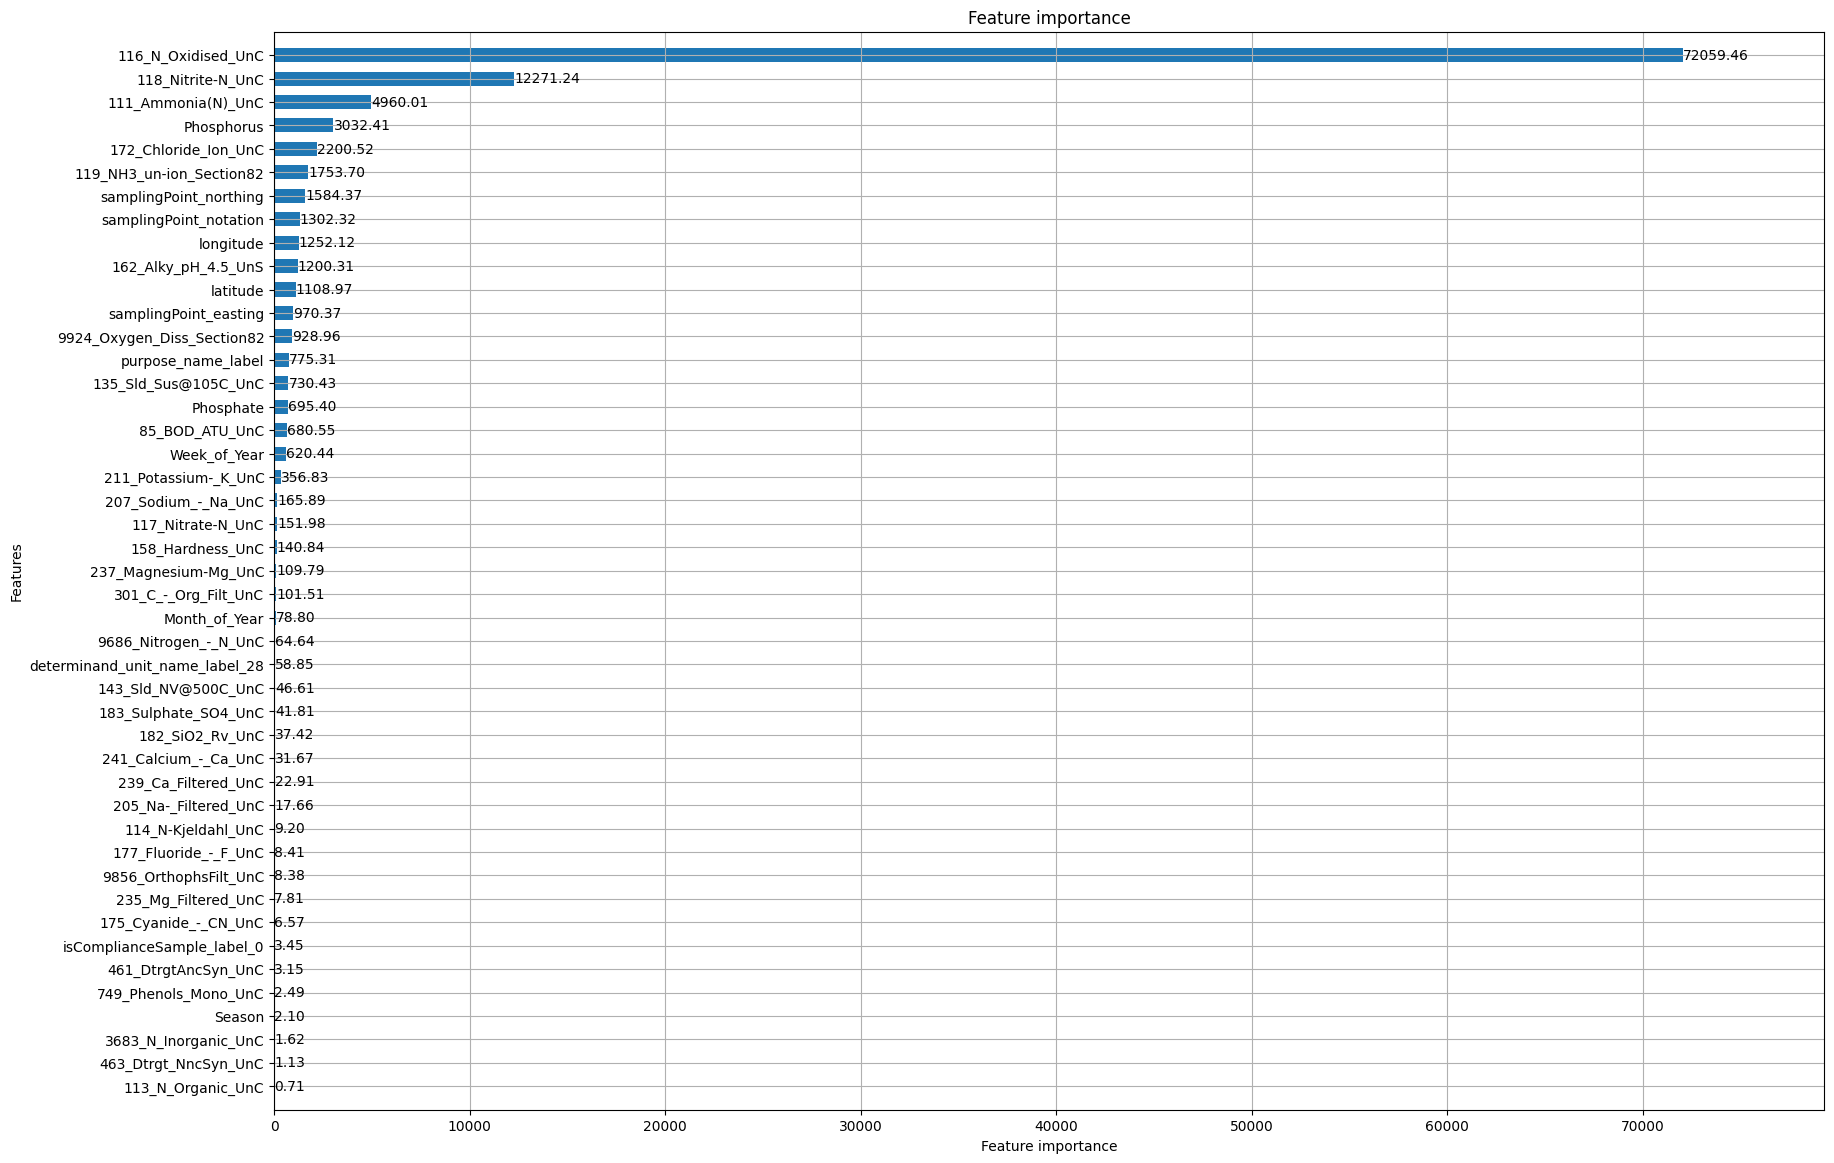

In [115]:
# plotting feature importance
lgbfeat.plot_importance(lightGBM_model, height=0.6, title='Feature importance',
                    xlabel='Feature importance', ylabel='Features',importance_type='auto', 
                    max_num_features=None, ignore_zero=True, figsize=(20,14), dpi=None, grid=True, precision=2)
#lgb.plot_importance(model)

In [116]:
print(read_file_name)

08_nb_transpose_2959_all2_with_r_mon.csv


In [118]:
#Save Model in a pickle file Pasu - to resume 18 Apr 2025
import pickle

# save the LightGBM model as a pickle file
'''
if (read_file_name == "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    model_pkl_file = "../RDMAI_1C_OrthoP_R1/06_Saved_Model/LGBM_WoutRMon_R1.pkl"
    #model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_Full_WoutMon.pkl"
else:
    model_pkl_file = "../RDMAI_1C_OrthoP_R1/06_Saved_Model/LGBM_WouRMon_R1.pkl"
    #model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_Full_WithMon.pkl"
'''

if (read_file_name == "08_nb_transpose_2959_all2_with_r_mon.csv"):
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithRMon_R1.pkl"
else:
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithoutRMon_R1.pkl"


print(model_pkl_file)

with open(model_pkl_file, 'wb') as file:
    pickle.dump(lightGBM_model, file)

../03_prediction_model/pkls/LGBM_WithRMon_R1.pkl


In [119]:
print(len(y_test), len(X_test), len(y_valid), len(X_valid))

#906782 906782 197 197

906782 906782 197 197


In [120]:
#del(df, data, gdf, dataTuned, X, y)

In [121]:
#y_test
#lightGBM_predictions.shape
#lightGBM_predictions
#print(len(lightGBM_predictions))

In [122]:
lightGBM_df = []
lightGBM_df = pd.DataFrame(y_test)
lightGBM_df['Predicted_OrthoP'] = lightGBM_predictions
lightGBM_df = lightGBM_df.reset_index()
print(len(lightGBM_df))
lightGBM_df.tail(2)

906782


,sampleDateOnly,OrthoP,Predicted_OrthoP
906780,2020-03-02,0.03,0.066172
906781,2010-08-10,0.00,0.000064


In [123]:
#Negative OrthoP values check
print(len(lightGBM_df[lightGBM_df['OrthoP']<0]), len(lightGBM_df[lightGBM_df['Predicted_OrthoP']<0]))

0 2472


0.0 0.5
-0.02513920099045335 0.4245529874392411 0.015729023078211318 0.013217380958853551


/var/tmp/ipykernel_17138/2595817049.py:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot({"Date": lightGBM_df_reSample['sampleDateOnly'], "Actual OrthoP" : lightGBM_df_reSample['OrthoP']}, markers=True,


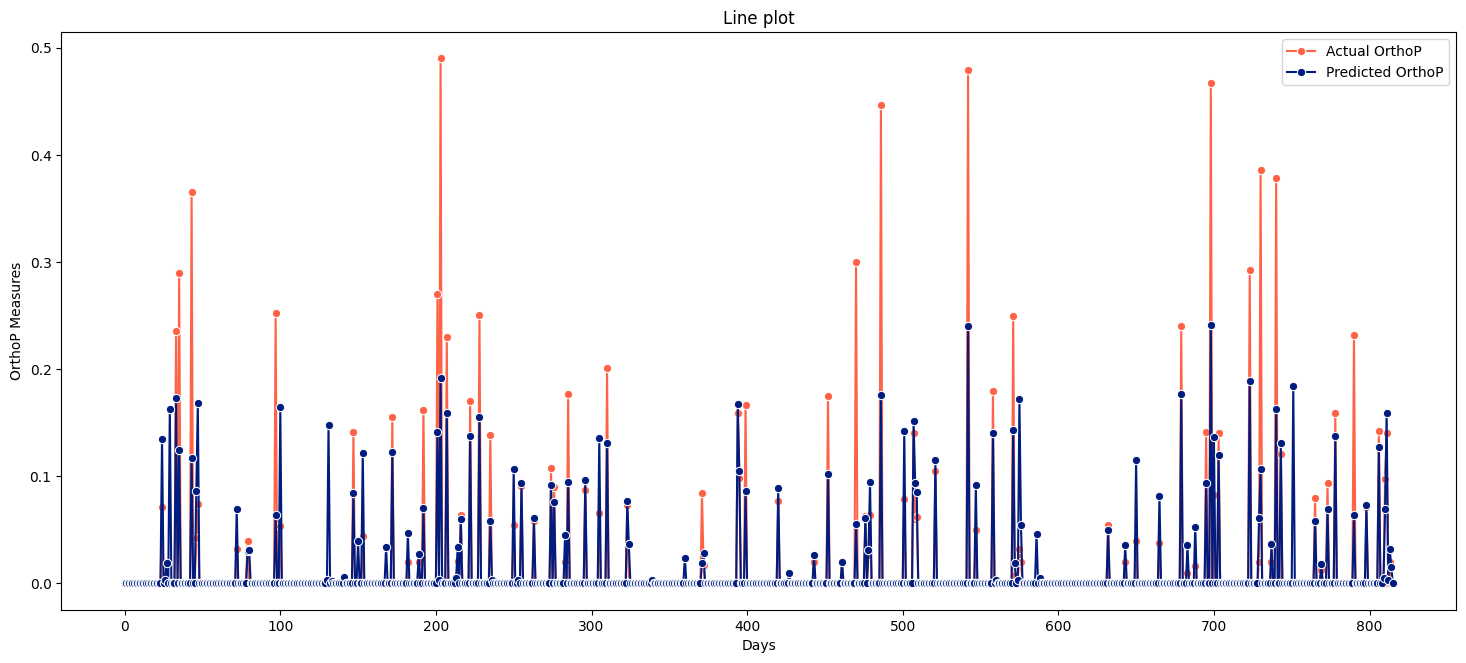

In [124]:
print(lightGBM_df['OrthoP'].min(), lightGBM_df['OrthoP'].max())
print(lightGBM_df['Predicted_OrthoP'].min(), lightGBM_df['Predicted_OrthoP'].max(), lightGBM_df['OrthoP'].mean(), lightGBM_df['Predicted_OrthoP'].mean())
#lightGBM_df50 = lightGBM_df.head(100)
lightGBM_df_reSample = lightGBM_df.sample(frac=0.0009,random_state=1).reset_index(drop=False)

#custom_palette = sns.color_palette(["#FF6347", "#4682B4", "#32CD32"])
custom_palette = sns.color_palette(["#FF6347", "#4682B4"])

plt.figure(figsize=(18,7.5))

sns.lineplot({"Date": lightGBM_df_reSample['sampleDateOnly'], "Actual OrthoP" : lightGBM_df_reSample['OrthoP']}, markers=True, 
             palette=custom_palette)
ap = sns.lineplot({"Date": lightGBM_df_reSample['sampleDateOnly'], "Predicted OrthoP" : lightGBM_df_reSample['Predicted_OrthoP']}, markers=True,palette='dark')

# Set label for x-axis y-axis
ap.set(xlabel ="Days", ylabel = "OrthoP Measures", title ='Line plot')

plt.show()

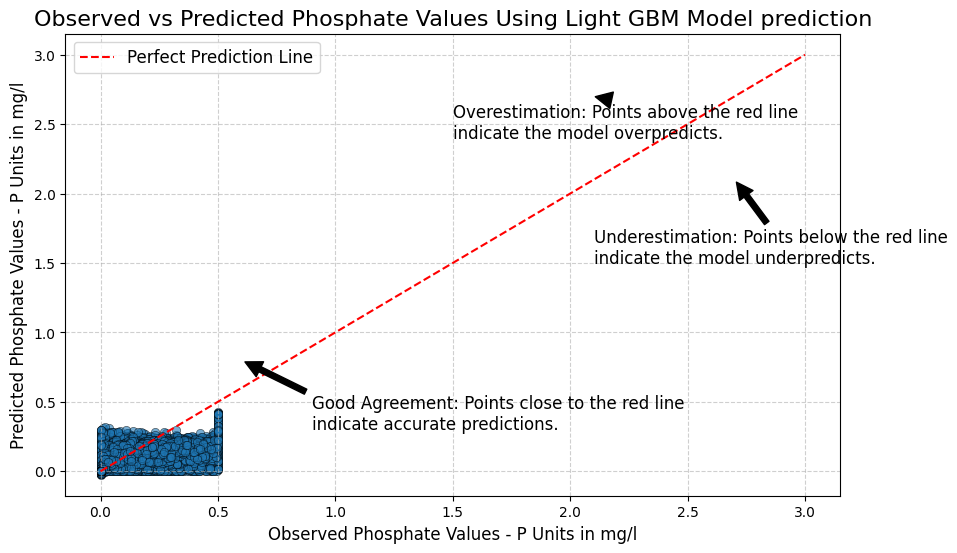

In [125]:
# Create a scatter plot for 5. Light GBM Prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lightGBM_predictions, alpha=0.6, edgecolor='k')
#plt.scatter(y_test, rf_predictions, alpha=0.7, color='g')

# Add a 45-degree line to represent perfect predictions
#plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction Line')
plt.plot([0, 3], [0, 3], 'r--', label='Perfect Prediction Line')

# Add labels and title
plt.title('Observed vs Predicted Phosphate Values Using Light GBM Model prediction', fontsize=16)
plt.xlabel('Observed Phosphate Values - P Units in mg/l', fontsize=12)
plt.ylabel('Predicted Phosphate Values - P Units in mg/l', fontsize=12)

# Add annotations for key inferences
plt.annotate('Good Agreement: Points close to the red line\nindicate accurate predictions.',
             #xy=(2, 2.5), xytext=(3, 1), fontsize=12,
             xy=(0.6, 0.8), xytext=(0.9, 0.3), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Overestimation: Points above the red line\nindicate the model overpredicts.',
             xy=(2.1, 2.7), xytext=(1.5, 2.4), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Underestimation: Points below the red line\nindicate the model underpredicts.',
             xy=(2.7, 2.1), xytext=(2.1, 1.5), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [126]:
print(read_file_name)

08_nb_transpose_2959_all2_with_r_mon.csv


In [127]:
#*********************************************************************
#******************** VALIDATION BEGINS       ************************
#*********************************************************************

In [129]:
#*********************************************************************
# Execute the saved model for Validation Catchment       *************
#*********************************************************************

# load model from pickle file TO TEST VALIDATION SET **** IMPORTANT STEP TO VALIDATE THE USERS CHOICE OF CATCHMENT DATA - PASU
# https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true (68 samples taken from Yr 2000)
# Area: Northumberland Durham And Tees | Sub Area: Wear & Tees | Sampling Point: Deerness U/S Priest Burn
#X_valid_scaled = scaler.transform(X_valid) #Transform so we prevent model to learn about test data as well. test data should be somehting model did not know and look for the first time

'''
if (read_file_name == "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    model_pkl_file = "../RDMAI_1C_OrthoP_R1/06_Saved_Model/LGBM_WoutRMon_R1.pkl"
    #model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_Full_WoutMon.pkl"
else:
    model_pkl_file = "../RDMAI_1C_OrthoP_R1/06_Saved_Model/LGBM_WouRMon_R1.pkl"
    #model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_Full_WithMon.pkl"
'''

if (read_file_name == "08_nb_transpose_2959_all2_with_r_mon.csv"):
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithRMon_R1.pkl"
else:
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithoutRMon_R1.pkl"
    
with open(model_pkl_file, 'rb') as file:  
    lightGBM_model_V = pickle.load(file)

# evaluate model 
y_predict = lightGBM_model_V.predict(X_valid)
#y_predict = lightGBM_model.predict(X_valid_scaled)

# check results
#print("No. of Xtest and ytest records: ", len(X_valid), len(X_valid_scaled), len(y_valid))
#dfPall_result = dfPall_outer.groupby(['sampleDateOnly', 'samplingPoint_notation',
#                                      'samplingPoint_easting', 'samplingPoint_northing',
#                                      'isComplianceSample_label',
#                                      'purpose_name_label',
#                                      'determinand_unit_name_label', 
#                                      'determinand_notation']
#                                    ).agg(daily_avg=('result', 'mean')
#                                         ).reset_index()

lightGBM_predictions = evaluate_model_adv(lightGBM_model_V, X_valid, y_valid, "LightGBM", "Validation")
#lightGBM_predictions = evaluate_model_adv(lightGBM_model, X_valid_scaled, y_valid, "LightGBM")

#Prep data to be sent to Q Metrics calculation
observed = y_valid
predicted = lightGBM_predictions
print(y_valid.min(), y_valid.max())


Metrics for the models' Prediction 
LightGBM RMSE: 0.04
LightGBM R²: -0.15
LightGBM adjusted Adjusted R²: -1.20
LightGBM Mean Squared Err: 0.00131
LightGBM Mean absolute Err: 0.03
MAPE Cant be calculated as Observed has Zero in it
................................................
Q Metrics results
Q1 Model (Explained Variance): -0.145
Q2 Model (Bias): -0.755
Q3 Model (Variance Ratio): 0.385
0.0 0.38


In [130]:
#Obtain metrics for the predicted values where the actual OrthoP is non-zeroes ONLY 
#X_Merge = pd.merge(X_valid, y_valid, on=X_valid.index)
#if (len(X_Merge) == len(X_valid)):
#    X_Merge = X_Merge.loc[X_Merge['OrthoP']>0]
#    X_test1 = X_Merge.drop(columns=['OrthoP'])
#    y_test1 = X_Merge['OrthoP']
#    print("validation", " Set")
#print(len(X_valid), len(y_valid), len(X_test1), len(y_test1))

In [131]:
lighdataTunedf = []
lightGBM_df = pd.DataFrame(y_valid)
lightGBM_df['Predicted_OrthoP'] = y_predict
lightGBM_df = lightGBM_df.reset_index()
X_valid.reset_index()
lightGBM_dfFinal = []
print(len(lightGBM_df), len(X_valid), len(y_valid))
lightGBM_dfFinal = pd.merge(lightGBM_df, X_valid, on=lightGBM_df.index)
print(len(lightGBM_df), len(lightGBM_dfFinal), len(X_valid))
lightGBM_dfFinal.tail(11)

#197 197 197
#197 197 197

197 197 197
197 197 197


,key_0,sampleDateOnly,OrthoP,Predicted_OrthoP,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name_label,116_N Oxidised_UnC,111_Ammonia(N)_UnC,...,determinand_unit_name_label_54,determinand_unit_name_label_56,determinand_unit_name_label_57,determinand_unit_name_label_58,determinand_unit_name_label_60,determinand_unit_name_label_61,determinand_unit_name_label_64,determinand_unit_name_label_65,determinand_unit_name_label_66,determinand_unit_name_label_67
186,186,2020-01-09,0.039,0.051460,0,420190,542201,3,1.40,0.130,...,0,0,0,0,0,0,0,0,0,0
187,187,2020-02-14,0.024,0.037444,0,420190,542201,3,1.60,0.034,...,0,0,0,0,0,0,0,0,0,0
188,188,2020-03-19,0.014,0.040340,0,420190,542201,3,1.00,0.030,...,0,0,0,0,0,0,0,0,0,0
189,189,2021-05-04,0.012,0.076794,0,420190,542201,3,1.50,0.095,...,0,0,0,0,0,0,0,0,0,0
190,190,2021-06-10,0.010,0.045040,0,420190,542201,3,0.34,0.030,...,0,0,0,0,0,0,0,0,0,0
191,191,2021-07-27,0.011,0.067807,0,420190,542201,3,0.32,0.030,...,0,0,0,0,0,0,0,0,0,0
192,192,2021-08-12,0.013,0.055186,0,420190,542201,3,0.40,0.030,...,0,0,0,0,0,0,0,0,0,0
193,193,2021-09-22,0.027,0.067807,0,420190,542201,3,0.34,0.030,...,0,0,0,0,0,0,0,0,0,0
194,194,2021-10-08,0.038,0.067131,0,420190,542201,3,1.50,0.110,...,0,0,0,0,0,0,0,0,0,0
195,195,2021-11-04,0.040,0.038851,0,420190,542201,3,0.89,0.030,...,0,0,0,0,0,0,0,0,0,0


In [132]:
print (len(lightGBM_dfFinal), len(lightGBM_df))
lightGBM_dfFinal.head(2)

#197 197

197 197


,key_0,sampleDateOnly,OrthoP,Predicted_OrthoP,samplingPoint_notation,...,determinand_unit_name_label_61,determinand_unit_name_label_64,determinand_unit_name_label_65,determinand_unit_name_label_66,determinand_unit_name_label_67
0,0,2000-02-09,0.0,0.050710,0,...,0,0,0,0,0
1,1,2000-03-02,0.0,0.063997,0,...,0,0,0,0,0


In [140]:
#*********************************************************************
# Storing Ground Truth Validation - Predicted data       *************
#*********************************************************************

#print (len(lightGBM_dfFinal))
# Save the Transposed data - Full data Transposed
#lightGBM_dfFinal.to_csv('../NW_DataPP/16_NB_Pred_Pt2_v9_OrthoAll_SpatioTemp_LightGBM.csv', index=True)

'''
if (read_file_name == "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    read_file_name = "LGBM_Validation_WoutR_Mon_R1.csv"
    #read_file_name = "16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_TestPredict_Wout_Mon.csv"
else:
    read_file_name = "LGBM_Validation_WouR_Mon_R1.csv"
    #read_file_name = "16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_TestPredict_With_Mon.csv"
#savedata(lightGBM_dfFinal, read_file_name, tpath='gcs://rdmai_dev_data/NW_Final/')
savedata(lightGBM_dfFinal, read_file_name, tpath='gcs://rdmai_dev_data/RDMAI_1C_OrthoP_R1/08_Validation_Outcome/')
'''

if (read_file_name == "08_nb_transpose_2959_all2_with_r_mon.csv"):
    write_file_name = "LGBM_Validation_WithR_Mon_R1.csv"
else:
    write_file_name = "LGBM_Validation_WithoutR_Mon_R1.csv"
savedata(lightGBM_dfFinal, write_file_name, tpath='gcs://rdmai_dev_data/cleansed/')

print(read_file_name, write_file_name)

08_nb_transpose_2959_all2_with_r_mon.csv LGBM_Validation_WithR_Mon_R1.csv


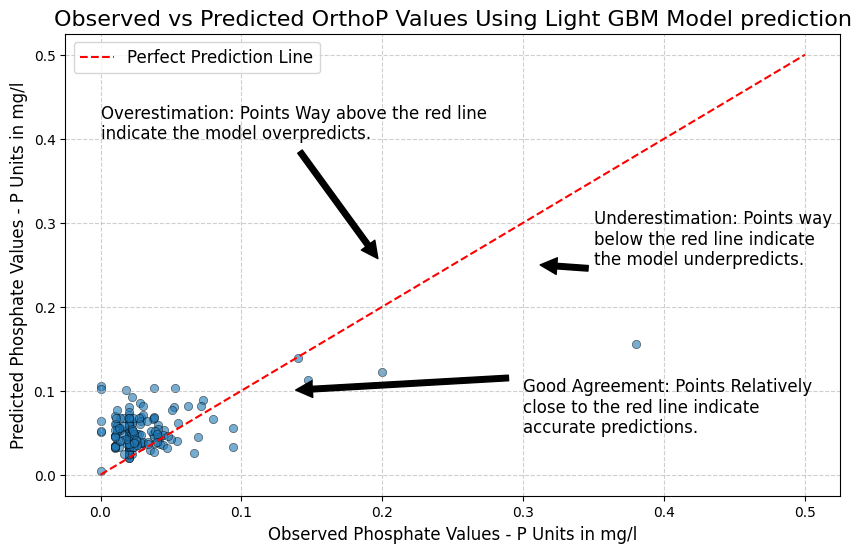

In [134]:
#*********************************************************************
# Create a scatter plot for Ground Truth Validation data *************
#*********************************************************************

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=y_predict, alpha=0.6, edgecolor='k')

# Add a 45-degree line to represent perfect predictions
#plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction Line')
#plt.plot([0, 3], [0, 3], 'r--', label='Perfect Prediction Line')
plt.plot([0, 0.5], [0, 0.5], 'r--', label='Perfect Prediction Line')

# Add labels and title
plt.title('Observed vs Predicted OrthoP Values Using Light GBM Model prediction', fontsize=16)
plt.xlabel('Observed Phosphate Values - P Units in mg/l', fontsize=12)
plt.ylabel('Predicted Phosphate Values - P Units in mg/l', fontsize=12)

# Add annotations for key inferences
plt.annotate('Good Agreement: Points Relatively \nclose to the red line indicate \naccurate predictions.',
             #xy=(2, 2.5), xytext=(3, 1), fontsize=12,
             #xy=(0.6, 0.8), xytext=(0.9, 0.3), fontsize=12,
             xy=(0.13, 0.1), xytext=(0.3, 0.05), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Overestimation: Points Way above the red line\nindicate the model overpredicts.',
             #xy=(2.1, 2.7), xytext=(1.5, 2.4), fontsize=12,
             xy=(0.2, 0.25), xytext=(0.0, 0.4), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Underestimation: Points way \nbelow the red line indicate \nthe model underpredicts.',
             #xy=(2.7, 2.1), xytext=(2.1, 1.5), fontsize=12,
             xy=(0.31, 0.25), xytext=(0.35, 0.25), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [135]:
#Final Visuals Begin

#%run "18_NB_Final_Visuals_UKMap.ipynb" - Old method

#Calling another notebook using papermill
# Steo 1: Install required packages
#!pip install papermill pandas pyarrow --quiet
#-- to be continued Pasu 21 Apr 2025

In [136]:
#Responsible AI - Begin

In [142]:
#Responsible AI
# Step 0: Install & Import required libraries for Shape testing
#pip install sklearn --user
#!pip install numpy | grep -v 'already'
!pip install shap | grep -v 'already' # Install SHAP if not already done
#!pip install --force-reinstall shap==0.44.0 lightgbm==4.1.0
#!conda install -c conda-forge shap -y

8147.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached shap-0.47.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.47.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (992 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [143]:
### **Fixed Code (Tested on Multiple SHAP Versions):**
import pickle
import shap
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
import lightgbm as lgb

print("Step 1: Load pre-trained LightGBM model")
'''
if (read_file_name == "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    model_pkl_file = "../RDMAI_1C_OrthoP_R1/06_Saved_Model/LGBM_WoutRMon_R1.pkl"
    #model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_Full_WoutMon.pkl"
else:
    model_pkl_file = "../RDMAI_1C_OrthoP_R1/06_Saved_Model/LGBM_WouRMon_R1.pkl"
    #model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_Full_WithMon.pkl"
    model_pkl_file = "../RDMAI_1C_OrthoP_R1/06_Saved_Model/LGBM_WouRMon_R1.pkl"
'''

if (read_file_name == "08_nb_transpose_2959_all2_with_r_mon.csv"):
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithRMon_R1.pkl"
else:
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithoutRMon_R1.pkl"
    
with open(model_pkl_file, 'rb') as file:  
    lightGBM_sklearn = pickle.load(file)

print("Step 2: Extract the native LightGBM booster")
#model = lightGBM_sklearn.booster_
#lightGBM_sklearn.booster_.save_model('../NW_CodePP/model.txt')
#lightGBM_sklearn.booster_.save_model('../RDMAI_1C_OrthoP_R1/06_Saved_Model.txt')
lightGBM_sklearn.booster_.save_model('../03_prediction_model/pkls/LGBM_WithRMon_R1.txt')

#import lightgbm as lgbshpvalid
#model = lgb.Booster(model_file='../NW_CodePP/model.txt')
model = lgb.Booster(model_file='../03_prediction_model/pkls/LGBM_WithRMon_R1.txt')

print("Step 3: Load dataset (for background data)")
#data = pd.read_csv('water_catchment_data.csv')
print("Training Dataset (Used for Background Context) - When to Use")
print(" Global Explanations (how the model behaves overall) | Baseline Calculation (`explainer.expected_value`) | Feature Importance")
#Xsample = X_train.sample(frac=0.00009, random_state=42)
Xsample = X_train.sample(frac=0.4, random_state=42)
ysample = y_train[y_train.index.isin(Xsample.index)]

print("Test/Prediction/Validation/New Dataset (Used for Background Context) - When to Use")
print("Local Explanations (individual predictions) | Model Debugging (why specific predictions are wrong) | Domain Validation (do explanations align with expert knowledge?)")
Xvalid = X_valid #X_test
yvalid = y_valid #y_test


print(len(Xsample), len(Xvalid), len(yvalid))
#Since we have loaded X and y already this step is commented


Step 1: Load pre-trained LightGBM model
Step 2: Extract the native LightGBM booster
Step 3: Load dataset (for background data)
Training Dataset (Used for Background Context) - When to Use
 Global Explanations (how the model behaves overall) | Baseline Calculation (`explainer.expected_value`) | Feature Importance
Test/Prediction/Validation/New Dataset (Used for Background Context) - When to Use
Local Explanations (individual predictions) | Model Debugging (why specific predictions are wrong) | Domain Validation (do explanations align with expert knowledge?)
3264412 197 197


Using 197 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


1. Load model
2. Create prediction wrapper
3. Initialize KernelExplainer with version-safe parameters
4. Get SHAP values : Highest variance


  0%|          | 0/1 [00:00<?, ?it/s]

5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI


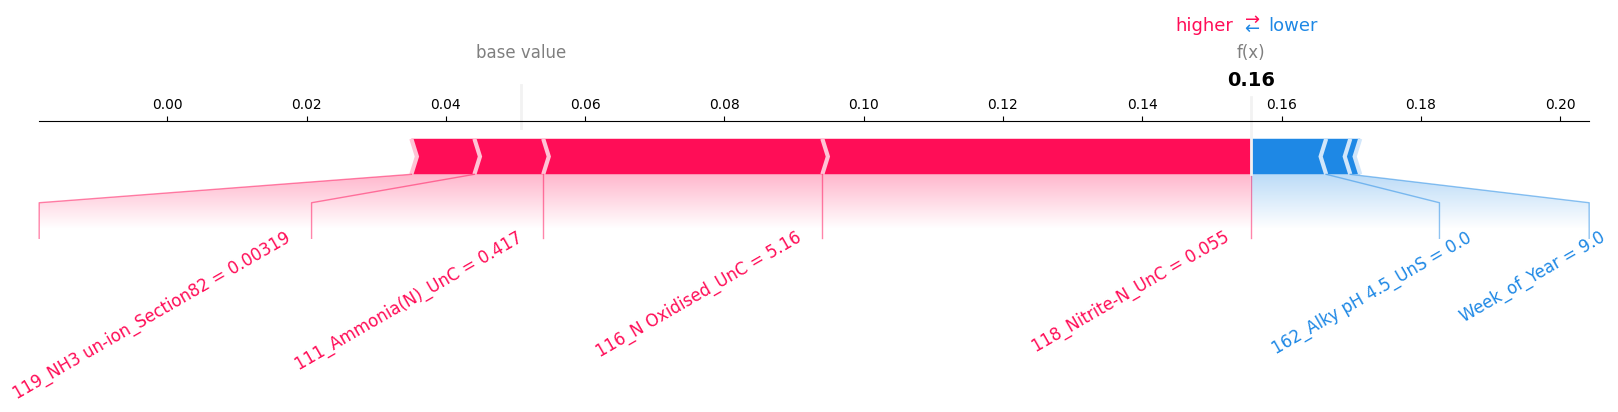

4. Get SHAP values : Lowest variance


  0%|          | 0/1 [00:00<?, ?it/s]

5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI


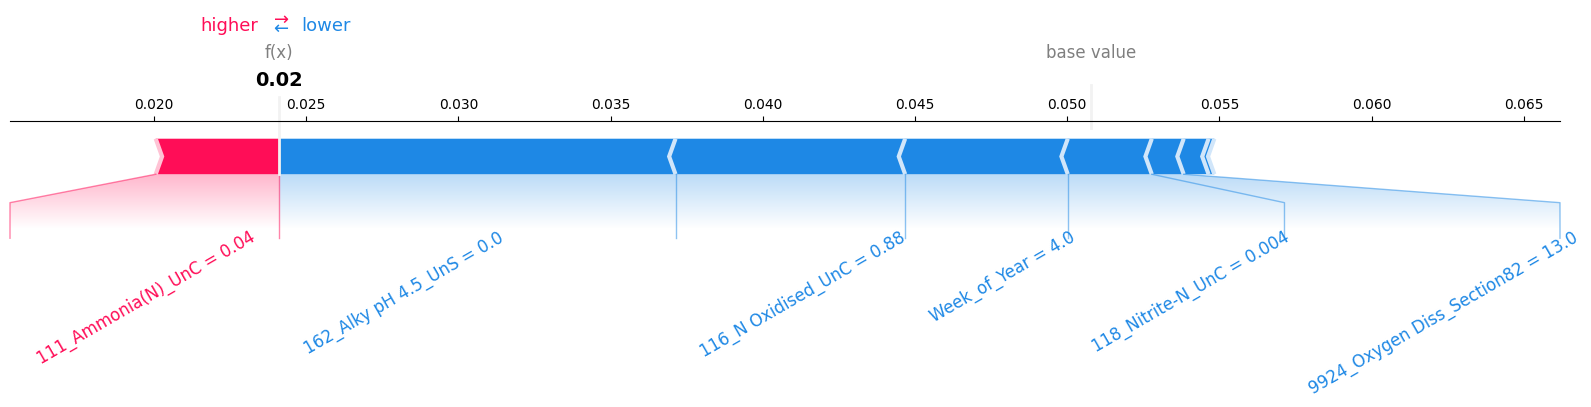

In [144]:
#*****************************************************************************
# ********* RESPONSIBLE AI - VALIDATION | PREDICTION EXPLAINATION. ***********
#*****************************************************************************

#import shap
#import lightgbm as lgb
#import pandas as pd

print("1. Load model")
#model_V = lgb.Booster(model_file='model.txt')
model_V = lgb.Booster(model_file='../03_prediction_model/pkls/LGBM_WithRMon_R1.txt')

print("2. Create prediction wrapper")
def lgb_predict_V(data):
    return model_V.predict(data.values if isinstance(data, pd.DataFrame) else data)

print("3. Initialize KernelExplainer with version-safe parameters")
try:
    # For SHAP >=0.41.0
    explainer = shap.KernelExplainer(
        model=lgb_predict_V, 
        data=Xvalid,    # Backgroud data (Supply Training or Validation data)
        link="identity"  # Use string instead of shap.links.identity
    )
except TypeError:
    # Fallback for older SHAP versions
    explainer = shap.KernelExplainer(
        model=lgb_predict_V, 
        data=Xvalid     # Backgroud data (Supply Training or Validation data)
    )

print("4. Get SHAP values : Highest variance")
shap_values_V = explainer.shap_values(Xvalid.iloc[[50]])
print("5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI")
shap.force_plot(
    explainer.expected_value,
    shap_values_V,
    Xvalid.iloc[50], 
    feature_names=Xvalid.columns,
    matplotlib=True,
    text_rotation=30
)

print("4. Get SHAP values : Lowest variance")
shap_values_V_Low = explainer.shap_values(Xvalid.iloc[[62]])
print("5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI")
shap.force_plot(
    explainer.expected_value,
    shap_values_V_Low,
    Xvalid.iloc[62], 
    feature_names=Xvalid.columns,
    matplotlib=True,
    text_rotation=30
)


#print("Step 6. Explain TEST predictions (predicted data)")
#shap_values_valid = explainer.shap_values(Xvalid)
#shap.decision_plot(explainer.expected_value, shap_values_valid, Xvalid)

#plt.gcf().set_size_inches(12,4) #Adjust the plot size
#plt.tight_layout()
#plt.show()

#*****************************************************************************
# ****** RESPONSIBLE AI - GLOBAL PREDICTION EXPLANATION | TRAIN-TEST *********
#*****************************************************************************

#Step to skip the cell if the Global Train dataset sample size is inadequate for Resp. AI analysis
if (len(Xsample) < 100000):
    %%skip #Skip cell execution
    print("Responsible AI for Global Train: Test predictions skipped...")
else:
    print("Running Responsible AI for Global Train: Test predictions...")
    
import shap
import lightgbm as lgb
import pandas as pd

print("1. Load model")
model = lgb.Booster(model_file='model.txt')

print("2. Create prediction wrapper")
def lgb_predict(data):
    return model.predict(data.values if isinstance(data, pd.DataFrame) else data)

print("3. Initialize KernelExplainer with version-safe parameters")
try:
    # For SHAP >=0.41.0
    explainer = shap.KernelExplainer(
        model=lgb_predict, 
        data=Xsample,    # Backgroud data (Supply Training or Validation data)
        link="identity"  # Use string instead of shap.links.identity
    )
except TypeError:
    # Fallback for older SHAP versions
    explainer = shap.KernelExplainer(
        model=lgb_predict, 
        data=Xsample     # Backgroud data (Supply Training or Validation data)
    )

print("4. Get SHAP values")
shap_values = explainer.shap_values(Xsample.iloc[[0]])

print("5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI")
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    Xsample.iloc[0],
    feature_names=Xsample.columns,
    matplotlib=True,
    text_rotation=30
)

'''
print("5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP (using Alternate library) - Responsible AI")
shap.initjs()
shap.force_plot(
    explainer.expected_value, 
    shap_values[0], 
    Xsample.iloc[0],
    matplotlib=True,
    text_rotation=30
)
'''

#print("Step 6. Explain TEST predictions (predicted data)")
#shap_values_valid = explainer.shap_values(Xvalid)
#shap.decision_plot(explainer.expected_value, shap_values_valid, Xvalid)

#plt.gcf().set_size_inches(12,4) #Adjust the plot size
#plt.tight_layout()
#plt.show()

In [145]:
#Critical step to calculate shap values for Xvalid (prediction inputs)
shap_values_V_Full = explainer.shap_values(Xvalid)
#print(shap_values_valid)

  0%|          | 0/197 [00:00<?, ?it/s]

In [146]:
#Xvalid[Xvalid.index.year==2015]
#features = Xvalid.iloc[select]
#features_display = Xvalid.loc[features.index]
#print(select)
#print(Xvalid.iloc[0:20])
#print(features)
#print (features.index)
#print (len(features_display))


Explainer expected value: [0.01570675]
SHAP Decision PLOT using entire Validation dataset


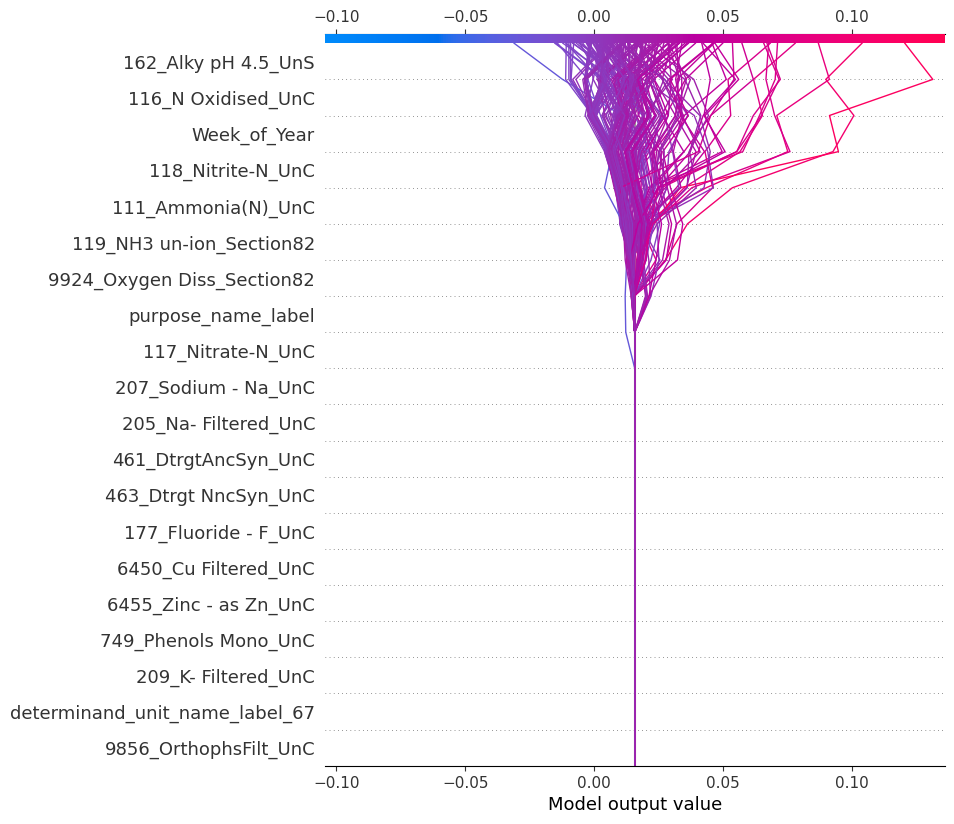

In [147]:
#Various decision plots
#https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html
#Sample 1

import warnings
warnings.filterwarnings('ignore')

explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(len(Xvalid)) # 197 observations
features = Xvalid.iloc[select]
features_display = Xvalid.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

print("SHAP Decision PLOT using entire Validation dataset")
shap.decision_plot(explainer.expected_value, shap_values_V_Full, Xvalid)

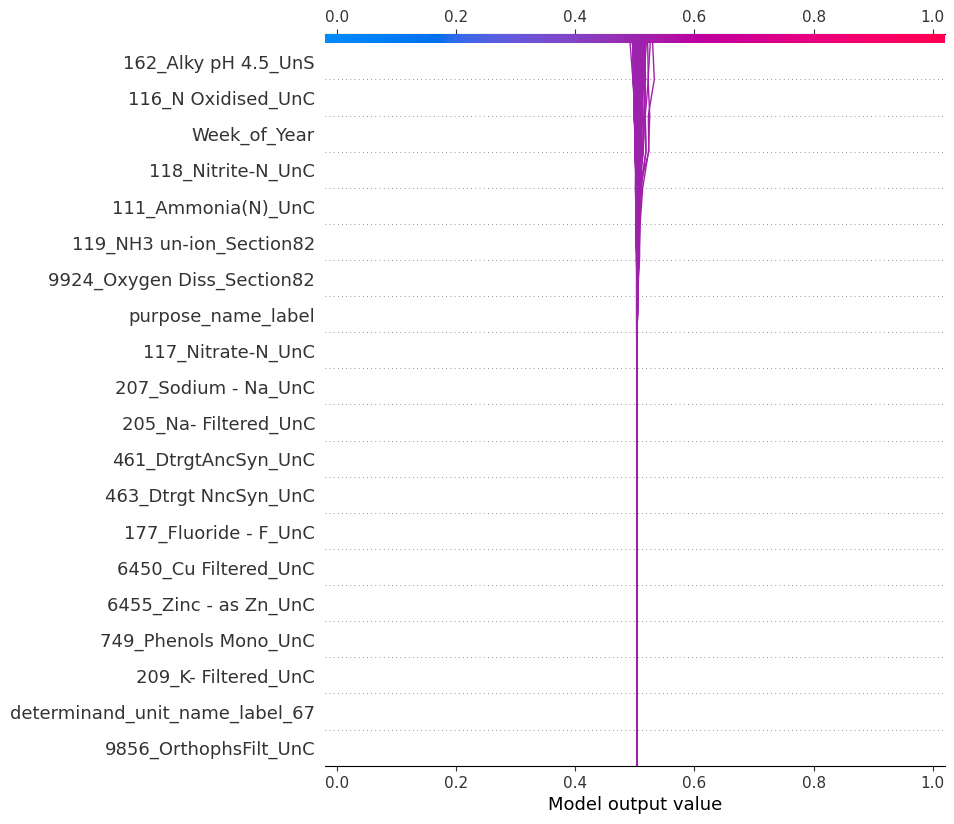

In [148]:
#Various decision plots
#https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html
#Sample 2

shap.decision_plot(expected_value, shap_values_V_Full, features_display, link="logit")


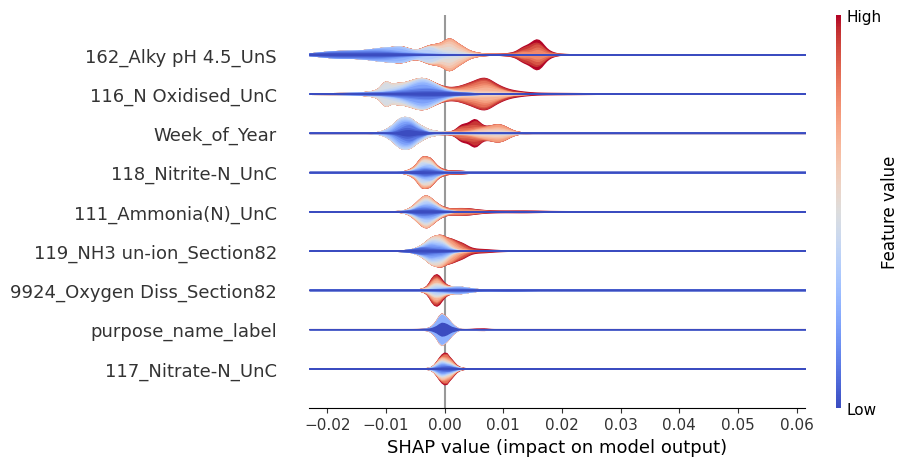

In [152]:
#Violin plots Feature Importance
#https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/violin.html
#Sample 3

feat_names = list(Xvalid.columns)
#ZeroDivisionError: division by zero:- Please note change the max_display to a number that does not give the error. Here 11 works 
#good as there are 11 influential features 
#shap.plots.violin(shap_values_V_Full, features=Xvalid, max_display=11, feature_names=feat_names, plot_type="layered_violin")
shap.plots.violin(shap_values_V_Full, features=Xvalid, max_display=9, feature_names=feat_names, plot_type="layered_violin")

In [153]:
'''
SHAP Documentation
1.Baseline Value (`explainer.expected_value`): 
    This is the average predicted orthophosphate level across all water samples. Your specific catchment’s prediction starts from this baseline.

2. Feature Contributions (Red/Blue Bars): 
   - Red (Positive Impact): 
     Factors pushing orthophosphate levels higher than average. For example, high agricultural runoff (+X mg/L) suggests fertilizer use may be contributing
   - Blue (Negative Impact): 
     Factors pulling levels lower than average. For example, low pH (-Y mg/L) might indicate reduced phosphate solubility due to acidity.

3. Critical Features: 
   The largest bars show the most influential factors. If turbidity is a top driver, sediment-bound phosphate transport could be a key process in your catchment.

#### Domain-Specific Interpretation Template: 
 The model predicts your catchment’s orthophosphate level at {predicted_value} mg/L (vs. average {baseline} mg/L). 
 Key drivers:
 +{value} mg/L from {feature} (e.g., heavy rainfall increasing agricultural runoff) 
 -{value} mg/L from {feature} (e.g., recent water treatment reducing industrial discharge) 
 This aligns with known phosphate dynamics where {domain_insight} 

### Actionable Insights for Water Experts: 
1. Prioritize Monitoring: Focus on top 3 features from the plot (e.g., nitrate levels, flow rate). 
2. Validate Mechanistically: Check if high-impact features match known catchment processes (e.g., septic system leaks if "proximity_to_housing" is significant). 
3. Mitigation Strategies: 
   - If pH is a major driver, suggest limting to adjust acidity. 
   - If flow_rate dominates, recommend riparian buffers to slow runoff. 

# Example Output with Labels & Interpretation: 
Interpretation: 
 Predicted orthophosphate is 0.18 mg/L (above baseline 0.12 mg/L). The increase is primarily due to high nitrate levels (+0.04 mg/L) from farm 
    runoff and low dissolved oxygen (+0.02 mg/L) reducing phosphate binding. The water treatment plant’s 
    recent filtration upgrade (-0.01 mg/L) partially offset this rise
'''

'\nSHAP Documentation\n1.Baseline Value (`explainer.expected_value`): \n    This is the average predicted orthophosphate level across all water samples. Your specific catchment’s prediction starts from this baseline.\n\n2. Feature Contributions (Red/Blue Bars): \n   - Red (Positive Impact): \n     Factors pushing orthophosphate levels higher than average. For example, high agricultural runoff (+X mg/L) suggests fertilizer use may be contributing\n   - Blue (Negative Impact): \n     Factors pulling levels lower than average. For example, low pH (-Y mg/L) might indicate reduced phosphate solubility due to acidity.\n\n3. Critical Features: \n   The largest bars show the most influential factors. If turbidity is a top driver, sediment-bound phosphate transport could be a key process in your catchment.\n\n#### Domain-Specific Interpretation Template: \n The model predicts your catchment’s orthophosphate level at {predicted_value} mg/L (vs. average {baseline} mg/L). \n Key drivers:\n +{value

In [154]:
#Other Plots
'''
# 1. Initialize explainer with TRAINING data
explainer = shap.TreeExplainer(model, X_train.sample(100))

# 2. Global analysis (training data)
shap.summary_plot(explainer.shap_values(X_train), X_train)

print("Step 3. Explain TEST predictions (predicted data)")
shap_values_test = explainer.shap_values(X_test)
shap.decision_plot(explainer.expected_value, shap_values_test,  X_test)
shap.summary_plot(explainer.shap_values(X_train), X_test)
'''
### **Common Mistakes to Avoid**
#| Mistake                                      | Consequence                             | Fix                                                       |
#|----------------------------------------------|-----------------------------------------|-----------------------------------------------------------|
#| Using test data as `data` in `TreeExplainer` | Biased baseline values                  | Always use training data for the explainer background     |
#| Explaining training predictions only         | Overlooks model behavior on unseen data | Use test/new data for local explanations                  |
#| Not sampling large training data             | Slow SHAP computations                  | Use `X_train.sample(1000)`                                |

'\n# 1. Initialize explainer with TRAINING data\nexplainer = shap.TreeExplainer(model, X_train.sample(100))\n\n# 2. Global analysis (training data)\nshap.summary_plot(explainer.shap_values(X_train), X_train)\n\nprint("Step 3. Explain TEST predictions (predicted data)")\nshap_values_test = explainer.shap_values(X_test)\nshap.decision_plot(explainer.expected_value, shap_values_test,  X_test)\nshap.summary_plot(explainer.shap_values(X_train), X_test)\n'

In [155]:
#Final Checks
#Data Validation
print("Missing values: ", Xvalid.isnull().sum().sum())    #must be zero
#print("Infinite values: ", np.isinf(Xp.values).sum()) #must be zero

#Version verification
print ("SHAP version: ", shap.__version__)   #should be >- 0.41.0
print("LightGBM version: ", lgb.__version__) #should be >= 4.0.0

#Model Sanity Check
print(model.predict(Xvalid.iloc[[0]])) #Should return valid predictions

#Missing values:  0
#SHAP version:  0.47.2
#LightGBM version:  4.5.0
#[0.05070975]

Missing values:  0
SHAP version:  0.47.2
LightGBM version:  4.5.0
[0.05070975]


In [156]:
#Responsible AI - End

In [157]:
showtime()
#END CARD

16 May 2025 13:00:39


()

In [158]:
# LightGBM Advanced - Begin

'''
# Split data into features (X) and target (y)
X = data.drop(columns=['OrthoP'])  # Replace 'Phosphate' with your target column
y = data['OrthoP']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) #Commented since to predict Specific Catchment's OrthoP
'''

'''
#for the Sampling point 'NE-44400163', the applicable eastings and northings are 420190 , 542201
X_train = data[data['samplingPoint_easting'] != 420190]
X_test = data[data['samplingPoint_easting'] == 420190]

y_train = X_train['OrthoP']
y_test = X_test['OrthoP']

X_train = X_train.drop(columns=['OrthoP'])
X_test = X_test.drop(columns=['OrthoP'])
'''

print(X_train.size, X_test.size, y_train.size, y_test.size) #, len(X_train.columns), len(X_test.columns()), len(y_train.columns()), len(y_test.columns()))
print(len(X_train), len(X_test), len(y_train), len(y_test))


'''
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# LightGBM Advanced
#showtime()
import lightgbm as lgb

# First round
# Regression Parameters BEST worked params
params = {
    "early_stopping_rounds":2400,
    'force_col_wise': 'true',
    "eval_metric" : 'rmse',
#    "eval_set" : [(X_test, y_test)],
    "eval_set" : [(X_test, y_test)],
    'eval_names': ['valid'],
    'objective': 'regression', #added Nov/23 #Linear or Non Linear
#    'objective': 'binary', #added Jan/25 Classification
    'boosting': 'gbdt', #added Nov/23
#    'boosting': 'dart', #added Nov/23
#    'metric': {'l2','l1', 'binary_logloss'}, #added Nov/23
    'metric': {'l2','l1'},
#    'metric': 'binary_logloss',
    'max_depth':450,
    'num_leaves': 75,
    'n_estimators': 1200,
    'learning_rate': 0.04,
    'min_data_in_bin':1,
    'min_data_in_leaf':1,
    'num_round':15,
#    'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
    'verbose': 100}

# Second round
params = {
    "early_stopping_rounds":5000,
    'force_col_wise': 'true',
    "eval_metric" : 'rmse',
#    "eval_set" : [(X_test, y_test)],
    "eval_set" : [(X_test, y_test)],
    'eval_names': ['valid'],
    'objective': 'regression', #added Nov/23 #Linear
#    'objective': 'binary', #added Jan/25 Classification
#    'boosting': 'gbdt', #added Nov/23
    'boosting': 'dart', #added Nov/23
#    'metric': {'l2','l1', 'binary_logloss'}, #added Nov/23
    'metric': {'l2','l1'},
#    'metric': 'binary_logloss',
    'max_depth':750,
    'num_leaves': 150,
    'n_estimators': 6500,
    'learning_rate': 0.005,
    'min_data_in_bin':1,
    'min_data_in_leaf':3500,
    'num_round':500,
#    'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
    'verbose': 100}

# Data into lgb
#lgb_train = lgb.Dataset(X_trainLGBM, y_train, categorical_feature=['Device_Name'])
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Fitting Mdl
#model = lgb.train(params, train_set=lgb_train, valid_sets=lgb_eval, early_stopping_rounds=30)
#model = lgb.train(params, train_set=lgb_train, valid_sets=lgb_eval)

#model = lgb.train(params, lgb_train, num_round, valid_sets=[lgb_train, lgb_eval])
OrthoAll_SpatioTemp_LGBM_HyperTuned = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval])
print(y_test.min(), y_test.max())
#showtime()

#lightGBM_predictions_adv = evaluate_model_adv(model, X_test, y_test, "LightGBM HyperTuned")
lightGBM_predictions_adv = evaluate_model_adv(OrthoAll_SpatioTemp_LGBM_HyperTuned, X_test, y_test, "LightGBM HyperTuned")

#Prep data to be sent to Q Metrics calculation
#observed = data['observed'].values
#predicted = data['predicted'].values
observed = y_test
predicted = lightGBM_predictions_adv
#Call Q metrics function
#q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)
#q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)  Commented as it was included in evaluate_model_adv
print(y_test.min(), y_test.max())

#from sklearn.model_selection import train_test_split
from sklearn import metrics

y_pred = OrthoAll_SpatioTemp_LGBM_HyperTuned.predict(X_test, num_iteration=OrthoAll_SpatioTemp_LGBM_HyperTuned.best_iteration)
#y_pred_binary = (y_pred > 0.5).astype(int) #For obtaining Binary Classifier

#accuracy = accuracy_score(y_test, y_pred_binary)
#print(f"Validation Accuracy: {accuracy:.2f}")

print(X_test.shape, y_pred.shape)

# plotting feature importance
#lgb.plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='Feature importance', 
#ylabel='Features', importance_type='auto', max_num_features=None, ignore_zero=True, figsize=None, dpi=None, grid=True, precision=3, **kwargs)[source]
lgb.plot_importance(OrthoAll_SpatioTemp_LGBM_HyperTuned, height=0.2, title='Feature importance',
                    xlabel='Feature importance', ylabel='Features',importance_type='auto', 
                    max_num_features=None, ignore_zero=True, figsize=(15,7.5), dpi=None, grid=True, precision=3)
#lgb.plot_importance(model)


lightGBM_df_Adv = []
lightGBM_df_Adv = pd.DataFrame(y_test)
print(type(lightGBM_df_Adv), type(y_test), type(y_pred), type(predicted))

lightGBM_df_Adv['Predicted_OrthoP'] = y_pred
lightGBM_df_Adv['Predicted_OrthoP_best_Iter'] = predicted
print(lightGBM_df_Adv.shape)

lightGBM_df_Adv = lightGBM_df_Adv.reset_index()
lightGBM_df_Adv_Final = lightGBM_df_Adv.merge(X_test, on='sampleDateOnly', how='left')
lightGBM_df_Adv_Final.tail(5)


len(lightGBM_df_Adv_Final)

print(lightGBM_df_Adv_Final['OrthoP'].min(), lightGBM_df_Adv_Final['OrthoP'].max())
print(lightGBM_df_Adv_Final['Predicted_OrthoP'].min(), lightGBM_df_Adv_Final['Predicted_OrthoP'].max())
#lightGBM_df_Adv_Final100 = lightGBM_df_Adv_Final.head(75000)
lightGBM_df_Adv_Final_reSample = lightGBM_df_Adv_Final.sample(frac=0.000009,random_state=1).reset_index(drop=False)
#lightGBM_df_Adv_Final100 = lightGBM_df_Adv_Final
#lightGBM_df_Adv_Final100 = lightGBM_df_Adv_Final.iloc[1220:1300, :]
#lightGBM_df_Adv_Final100 = lightGBM_df_Adv_Final.iloc[480:680, :]

custom_palette = sns.color_palette(["#FF6347", "#4682B4", "#32CD32", "magenta"])
#custom_palette = sns.color_palette(["#FF6347"])
custom_palette2 = sns.color_palette(["magenta"])

plt.figure(figsize=(15,7.5))
sns.lineplot({"Date": lightGBM_df_Adv_Final_reSample['sampleDateOnly'], "Actual OrthoP" : lightGBM_df_Adv_Final_reSample['OrthoP']}, palette=custom_palette)
#sns.lineplot({"Date": lightGBM_df_Adv_Final_reSample['sampleDateOnly'], "Predicted OrthoP" : lightGBM_df_Adv_Final_reSample['Predicted_OrthoP']}, palette=custom_palette2)
ap = sns.lineplot({"Date": lightGBM_df_Adv_Final_reSample['sampleDateOnly'], "Predicted OrthoP_Best_Iter" : lightGBM_df_Adv_Final_reSample['Predicted_OrthoP_best_Iter']}, palette=custom_palette2)

# Set label for x-axis y-axis
ap.set(xlabel ="No. of Observations <Stratified Sample>", ylabel = "OrthoP Measures mg/l", title ='Line plot')

plt.show()

'''
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
'''

print (len(lightGBM_df_Adv_Final))
# Save the Transposed data - Full data Transposed
#lightGBM_df_Adv_Final.to_csv('..//NW_DataPP/16_NB_Pred_Pt2_v9_OrthoAll_SpatioTemp_LightGBMAdv.csv', index=True)
if (read_file_name = "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    savedata(lightGBM_df_Adv_Final, "16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBMAdv_Wout_Mon.csv", tpath='gcs://rdmai_dev_data/NW_Final/')
else:
    savedata(lightGBM_df_Adv_Final, "16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBMAdv_With_Mon.csv", tpath='gcs://rdmai_dev_data/NW_Final/')

#Save Model in a pickle file
import pickle

# save the LightGBM model as a pickle file
if (read_file_name = "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBMAdv_Wout_Mon.pkl"
else:
    model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBMAdv_With_Mon.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(OrthoAll_SpatioTemp_LGBM_HyperTuned, file)

#model_pkl_file = "gcs://rdmai_dev_data/NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBMAdv.pkl"
#with open(model_pkl_file, 'wb') as file:
#    pickle.dump(OrthoAll_SpatioTemp_LGBM_HyperTuned, file)


# load model from pickle file
if (read_file_name = "12_NB_10Transpose_2959_All2_Without_R_Mon.csv"):
    model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBMAdv_Wout_Mon.pkl"
else:
    model_pkl_file = "../NW_SavedModelPP/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBMAdv_With_Mon.pkl"
with open(model_pkl_file, 'rb') as file:  
    Ortho2959_SpatioTemp_LGBM_HyperTuned = pickle.load(file)

# evaluate model 
y_predict = Ortho2959_SpatioTemp_LGBM_HyperTuned.predict(X_test)

# check results
lightGBM_Hyper_predictions = evaluate_model_adv(Ortho2959_SpatioTemp_LGBM_HyperTuned, X_test, y_test, "LightGBM HyperTuned")
#lightGBM_predictions = evaluate_model_adv(lightGBM_model, Sec82_X_test, y_test, "LightGBM")

#Prep data to be sent to Q Metrics calculation
#observed = data['observed'].values
#predicted = data['predicted'].values
observed = y_test
predicted = lightGBM_Hyper_predictions
#Call Q metrics function
#q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)
#q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)  Commented as it was included in evaluate_model_adv
print(y_test.min(), y_test.max())

# Create a scatter plot for 6. Light GBM Advanced (Hyperparameter Tuned) model Prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lightGBM_predictions_adv, alpha=0.6, edgecolor='k')
#plt.scatter(y_test, rf_predictions, alpha=0.7, color='g')

# Add a 45-degree line to represent perfect predictions
plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction Line')

# Add labels and title
plt.title('Observed vs Predicted Phosphate Values Using Light GBM Advanced (Hyperparameter Tuned) model', fontsize=16)
plt.xlabel('Observed Phosphate Values - P Units in mg/l', fontsize=12)
plt.ylabel('Predicted Phosphate Values - P Units in mg/l', fontsize=12)

# Add annotations for key inferences
plt.annotate('Good Agreement: Points close to the red line\nindicate accurate predictions.',
             xy=(2, 2.5), xytext=(3, 1), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Overestimation: Points above the red line\nindicate the model overpredicts.',
             xy=(7, 9), xytext=(5, 8), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Underestimation: Points below the red line\nindicate the model underpredicts.',
             xy=(9, 7), xytext=(7, 5), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [159]:
# LightGBM Advanced - End

In [160]:
#END CARD

In [161]:
exit()


# Define LightGBM model for Hyper tuning using RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform

import kerastuner
from kerastuner.tuners import RandomSearch


lgb_model = lgb.LGBMRegressor(
    objective='regression',
    random_state=42,
    device='gpu', #Using GPU acceleration 
    verbose=-1
)

# Hyperparameter search space
param_dist = {
    'num_leaves': randint(20, 150),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 12),
    'min_child_samples': randint(10, 200),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

class RealTimeLogger:
    def __init__(self):
        self.iteration = 0
   
    def __call__(self, estimator, parameters, cv_results):
        self.iteration += 1
        best_score = np.sqrt(-cv_results["best_score"])
        current_score = np.sqrt(-estimator.cv_results_["mean_test_score"][-1])
       
        print(f"Iteration {self.iteration}")
        print(f"  Current RMSE: {current_score:.4f}")
        print(f"  Best RMSE so far: {best_score:.4f}")
        print(f"  Parameters: {parameters}\n{'='*50}")

class PrintMetricsCallback:
    def __init__(self):
        self.iteration = 0
   
    def __call__(self, study):
        if self.iteration == 0:
            print(f"{'Iter':<5} | {'RMSE (CV)':<10} | {'Params'}")
            print("-" * 60)
       
        current_score = np.sqrt(-study.best_trial.value)
        print(f"{self.iteration:<5} | {current_score:.4f}    | {study.best_trial.params}")
        self.iteration += 1

# Randomized search
#random_search_keras = RandomSearch(
#grid_search = GridSearchCV(
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
#    n_iter=100,
    n_iter=7,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1,
    #Callback critical params
    error_score="raise",
    return_train_score=True,
#    callbacks=[
#        RealTimeLogger(), 
#        PrintMetricsCallback()
    ]
)

# Perform hyperparameter tuning
#random_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)
random_search_keras.fit(X_train, y_train)


'''
# Get best parameters
best_params = random_search.best_params_
print("Best parameters found:")
print(best_params)

# Train final model with best parameters
final_model = lgb.LGBMRegressor(
    **best_params,
    objective='regression',
    random_state=42,
    verbose=-1
)

final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.head(10))
'''

import optuna
from sklearn.metrics import mean_squared_error

# Modified RandomizedSearchCV initialization
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring=scoring,
    refit='neg_mse',  # Maintain RMSE optimization
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

def objective(trial):
    n_features = X_train.shape[1]  # Get from your training data
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': randint(20, 150),
#        'learning_rate': uniform(0.01, 0.3),
        'n_estimators': randint(100, 500),
#        'max_depth': randint(3, 12),
        'min_child_samples': randint(10, 200),
        'subsample': uniform(0.5, 0.5),
        'colsample_bytree': uniform(0.5, 0.5),
        'reg_alpha': uniform(0, 1),
        'reg_lambda': uniform(0, 1)
    }
    lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        device='gpu', #Using GPU acceleration 
        verbose=-1
    )
    #scoring = ['neg_mean_squared_error', 'r2', 'adjusted_rand_score',
    #      'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error',
    #      'neg_mean_squared_error', 'explained_variance']
    
    #scores = cross_val_score(lgb_model, X_train, y_train,
    #                        scoring=[scoring], cv=3)
    
    scores = cross_val_score(lgb_model, X_train, y_train,
                            scoring='neg_mean_squared_error', cv=3)
    rmse = np.sqrt(-scores.mean())
    #rmse = np.sqrt(-scores['neg_mean_squared_error'].mean())
    nrmse = (rmse/(max(y_train) - min(y_train)))

    r2 = (cross_val_score(lgb_model, X_train, y_train,
                            scoring='r2', cv=3)).mean()
    #r2 = -scores['r2'].mean()

    adj_r2 = (cross_val_score(lgb_model, X_train, y_train,
                            scoring='adjusted_rand_score', cv=3)).mean()
    #adj_r2 = -scores['adjusted_rand_score'].mean()
    
    mae = (cross_val_score(lgb_model, X_train, y_train,
                            scoring='neg_mean_absolute_error', cv=3)).mean()
    #mae = -scores['neg_mean_absolute_error'].mean()
    
    mape = (cross_val_score(lgb_model, X_train, y_train,
                            scoring='neg_mean_absolute_percentage_error', cv=3)).mean()
    #mape = -scores['neg_mean_absolute_percentage_error'].mean()
    
    mse = (cross_val_score(lgb_model, X_train, y_train,
                            scoring='neg_mean_squared_error', cv=3)).mean()
    #mse = -scores['neg_mean_squared_error'].mean()
    
    exvar = (cross_val_score(lgb_model, X_train, y_train,
                            scoring='explained_variance', cv=3)).mean()
    #exvar = scores['explained_variance'].mean()
        
    # Create custom scorers
    n_features = X_train.shape[1]  # Get from your training data
    '''
    scoring = {
        'neg_mse': 'neg_mean_squared_error',
        'r2': 'r2',
        'adj_r2': 'adjusted_rand_score',
        'mae': 'neg_mean_absolute_error',
        'mape': 'neg_mean_absolute_percentage_error',
        'mse': 'neg_mean_squared_error',
        'exvar' : 'explained_variance'
    }
    '''
    
    # Print to Vertex AI logs
    if trial.number % 5 == 0:  # Print every 5 iterations
        print(f"Iteration {trial.number} | RMSE: {rmse:.4f}")
        print(f"Iteration {trial.number} | NRMSE: {nrmse:.4f}")
        print(f"Iteration {trial.number} | R2: {r2}")
        print(f"Iteration {trial.number} | ADJUSTED_R2: {adj_r2}")
        print(f"Iteration {trial.number} | MAE: {mae}")
        print(f"Iteration {trial.number} | MAPE: {mape}")
        print(f"Iteration {trial.number} | MSE: {mse}")
        print(f"Iteration {trial.number} | Explained Variance: {exvar}")
   
    return rmse, nrmse, r2, adj_r2, mae, mape, mse, exvar

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

import sklearn
print(sklearn.__version__)
from google.cloud import aiplatform
import os

#PROJECT_ID = os.getenv("GOOGLE_CLOUD_PROJECT")
#LOCATION = os.getenv("GOOGLE_CLOUD_REGION")

aiplatform.init(project=os.getenv("GOOGLE_CLOUD_PROJECT"), location=os.getenv("GOOGLE_CLOUD_REGION"))
aiplatform.log_metrics({"rmse": rmse})
aiplatform.log_metrics({"nrmse": nrmse})
aiplatform.log_metrics({"r2": r2})
aiplatform.log_metrics({"adjusted r2": adj_r2})
aiplatform.log_metrics({"mae": mae})
aiplatform.log_metrics({"mape": mape})
aiplatform.log_metrics({"mse": mse})
aiplatform.log_metrics({"explained variance": exvar})

In [ ]:
#EXTENDED END CARD